# Análise de Dados de Dengue no Brasil - 2025

## Objetivos da Análise:
1. **Incidência por faixa etária**: Crianças (0-15), Jovens (15-23), Adultos (23-60), Idosos (60+)
2. **Sintomas mais comuns** em cada faixa etária
3. **Casos por região do Brasil** e faixa etária mais atingida
4. **Mortalidade** por faixa etária

## 1. Importar Bibliotecas Necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configurações de visualização
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Configuração para exibir todas as colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [2]:
# =============================================================================
# CRIAR PASTA PARA EXPORTAÇÃO DE GRÁFICOS
# =============================================================================

import os

# Criar pasta 'GRAFICOS' se não existir
pasta_graficos = 'GRAFICOS'
if not os.path.exists(pasta_graficos):
    os.makedirs(pasta_graficos)
    print(f"Pasta '{pasta_graficos}/' criada com sucesso!")
else:
    print(f"Pasta '{pasta_graficos}/' já existe.")

print(f"\nOs gráficos serão salvos em: {os.path.abspath(pasta_graficos)}")

Pasta 'GRAFICOS/' já existe.

Os gráficos serão salvos em: c:\Users\igor_\OneDrive\Área de Trabalho\GITHUB\ANALISE_DENGUE\GRAFICOS


## 2. Carregar e Explorar os Dados

In [3]:
# Carregar o arquivo CSV
df = pd.read_csv('DENGBR25.csv', encoding='latin-1', low_memory=False)

print(f"Dataset carregado com sucesso!")
print(f"\nDimensões: {df.shape[0]:,} linhas x {df.shape[1]} colunas")
print(f"\nPrimeiras linhas do dataset:")
df.head()

Dataset carregado com sucesso!

Dimensões: 1,605,624 linhas x 121 colunas

Primeiras linhas do dataset:


,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CLASSI_FIN,CRITERIO,DOENCA_TRA,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,MANI_HEMOR,EPISTAXE,GENGIVO,METRO,PETEQUIAS,HEMATURA,SANGRAM,LACO_N,PLASMATICO,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W
0,2,A90,2025-01-06,202502,2025,12,120020,1941.0,2000202.0,2025-01-01,202501,1965.0,4059,F,5.0,4.0,NaN,12,120020.0,1941.0,1,2025-01-06,NaN,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-06,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,NaN,NaN,1.0,NaN,2025-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2025-01-08,0,NaN,NaN
1,2,A90,2025-01-13,202503,2025,12,120020,1941.0,2002914.0,2025-01-11,202502,1988.0,4036,M,6.0,4.0,8.0,12,120020.0,1941.0,1,2025-01-13,NaN,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-13,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,NaN,NaN,1.0,NaN,2025-01-29,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2025-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2025-01-15,0,NaN,NaN
2,2,A90,2025-02-19,202508,2025,12,120020,1941.0,2000202.0,2025-02-14,202507,1994.0,4030,F,5.0,4.0,NaN,12,120020.0,1941.0,1,2025-02-19,NaN,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,NaN,NaN,1.0,NaN,2025-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2025-05-05,0,NaN,NaN
3,2,A90,2025-03-17,202512,2025,12,120020,1941.0,5336171.0,2025-03-16,202512,1997.0,4028,M,6.0,4.0,NaN,12,120020.0,1941.0,1,2025-03-17,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-26,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2025-03-17,12.0,120020.0,NaN,NaN,NaN,NaN,10.0,1.0,NaN,NaN,1.0,NaN,2025-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2025-03-24,1,NaN,NaN
4,2,A90,2025-04-06,202515,2025,12,120020,1941.0,5336171.0,2025-03-25,202513,1997.0,4028,M,6.0,4.0,NaN,12,120020.0,1941.0,1,2025-04-06,NaN,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-26,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,NaN,NaN,1.0,NaN,2025-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2025-06-18,1,NaN,NaN


In [4]:
# Informações sobre as colunas
print("Informações do Dataset:")
print("=" * 50)
df.info()

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605624 entries, 0 to 1605623
Columns: 121 entries, TP_NOT to MIGRADO_W
dtypes: float64(92), int64(10), object(19)
memory usage: 1.4+ GB


In [5]:
# Lista de todas as colunas
print("Colunas do dataset:")
print("=" * 50)
for i, col in enumerate(df.columns, 1):
    print(f"{i:3}. {col}")

Colunas do dataset:
  1. TP_NOT
  2. ID_AGRAVO
  3. DT_NOTIFIC
  4. SEM_NOT
  5. NU_ANO
  6. SG_UF_NOT
  7. ID_MUNICIP
  8. ID_REGIONA
  9. ID_UNIDADE
 10. DT_SIN_PRI
 11. SEM_PRI
 12. ANO_NASC
 13. NU_IDADE_N
 14. CS_SEXO
 15. CS_GESTANT
 16. CS_RACA
 17. CS_ESCOL_N
 18. SG_UF
 19. ID_MN_RESI
 20. ID_RG_RESI
 21. ID_PAIS
 22. DT_INVEST
 23. ID_OCUPA_N
 24. FEBRE
 25. MIALGIA
 26. CEFALEIA
 27. EXANTEMA
 28. VOMITO
 29. NAUSEA
 30. DOR_COSTAS
 31. CONJUNTVIT
 32. ARTRITE
 33. ARTRALGIA
 34. PETEQUIA_N
 35. LEUCOPENIA
 36. LACO
 37. DOR_RETRO
 38. DIABETES
 39. HEMATOLOG
 40. HEPATOPAT
 41. RENAL
 42. HIPERTENSA
 43. ACIDO_PEPT
 44. AUTO_IMUNE
 45. DT_CHIK_S1
 46. DT_CHIK_S2
 47. DT_PRNT
 48. RES_CHIKS1
 49. RES_CHIKS2
 50. RESUL_PRNT
 51. DT_SORO
 52. RESUL_SORO
 53. DT_NS1
 54. RESUL_NS1
 55. DT_VIRAL
 56. RESUL_VI_N
 57. DT_PCR
 58. RESUL_PCR_
 59. SOROTIPO
 60. HISTOPA_N
 61. IMUNOH_N
 62. HOSPITALIZ
 63. DT_INTERNA
 64. UF
 65. MUNICIPIO
 66. TPAUTOCTO
 67. COUFINF
 68. COPAISINF
 

## 2.1 Tratamento de Dados - Estrutura SINAN

Conversao dos tipos de dados conforme padroes do Sistema de Informacao de Agravos de Notificacao (SINAN):
- **Identificadores**: Codigos categoricos (nao devem ser somados)
- **Marcadores Temporais**: Datas e semanas epidemiologicas
- **Dados Demograficos**: Variaveis categoricas codificadas
- **Sintomas/Comorbidades**: Variaveis binarias (1=Sim, 2=Nao)
- **Classificacoes e Desfechos**: Variaveis categoricas

In [6]:
# =============================================================================
# DEFINICAO DAS COLUNAS POR CATEGORIA SINAN
# =============================================================================

# 1. IDENTIFICADORES (Codigos de Local e Unidade) - Tipo: category/string
colunas_identificadores = [
    'ID_AGRAVO', 'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 
    'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'CO_MUN_NOT', 
    'CO_MUN_RES', 'ID_OCUPA_N'
]

# 2. MARCADORES TEMPORAIS - Tipo: category/int (nao devem ser somados)
colunas_temporais = [
    'NU_ANO', 'SEM_NOT', 'SEM_PRI', 'ANO_NASC', 
    'DT_NOTIFIC', 'DT_SIN_PRI', 'DT_NASC', 'DT_INVEST',
    'DT_OBITO', 'DT_ENCERRA', 'DT_DIGITA'
]

# 3. DADOS DEMOGRAFICOS E SOCIAIS - Tipo: category
colunas_demograficas = [
    'TP_NOT', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 
    'CS_RACA', 'CS_ESCOL_N', 'SG_UF_NOT', 'SG_UF'
]

# 4. SINTOMAS E COMORBIDADES (1=Sim, 2=Nao) - Tipo: category
colunas_sintomas_binarios = [
    'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 
    'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N',
    'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 
    'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE'
]

# 5. CLASSIFICACOES E DESFECHOS - Tipo: category
colunas_classificacao = [
    'CLASSI_FIN', 'CRITERIO', 'EVOLUCAO', 'SOROTIPO', 
    'TPAUTOCTO', 'HOSPITALI', 'RESUL_VI_N', 'RESUL_NS1',
    'HISTOPA_N', 'IMUNOH_N'
]

print("Categorias de colunas SINAN definidas:")
print(f"  - Identificadores: {len(colunas_identificadores)} colunas")
print(f"  - Temporais: {len(colunas_temporais)} colunas")
print(f"  - Demograficas: {len(colunas_demograficas)} colunas")
print(f"  - Sintomas/Comorbidades: {len(colunas_sintomas_binarios)} colunas")
print(f"  - Classificacoes: {len(colunas_classificacao)} colunas")

Categorias de colunas SINAN definidas:
  - Identificadores: 10 colunas
  - Temporais: 11 colunas
  - Demograficas: 8 colunas
  - Sintomas/Comorbidades: 21 colunas
  - Classificacoes: 10 colunas


In [7]:
# =============================================================================
# CONVERSAO DE TIPOS - IDENTIFICADORES PARA CATEGORY/STRING
# =============================================================================

print("Convertendo IDENTIFICADORES para tipo categorico...")
print("=" * 60)

for col in colunas_identificadores:
    if col in df.columns:
        tipo_original = df[col].dtype
        df[col] = df[col].astype('category')
        print(f"  {col}: {tipo_original} -> category")
    else:
        print(f"  {col}: NAO ENCONTRADA no dataset")

Convertendo IDENTIFICADORES para tipo categorico...
  ID_AGRAVO: object -> category
  ID_MUNICIP: int64 -> category
  ID_REGIONA: float64 -> category
  ID_REGIONA: float64 -> category
  ID_UNIDADE: float64 -> category
  ID_UNIDADE: float64 -> category
  ID_MN_RESI: float64 -> category
  ID_RG_RESI: float64 -> category
  ID_PAIS: int64 -> category
  CO_MUN_NOT: NAO ENCONTRADA no dataset
  CO_MUN_RES: NAO ENCONTRADA no dataset
  ID_OCUPA_N: object -> category
  ID_MN_RESI: float64 -> category
  ID_RG_RESI: float64 -> category
  ID_PAIS: int64 -> category
  CO_MUN_NOT: NAO ENCONTRADA no dataset
  CO_MUN_RES: NAO ENCONTRADA no dataset
  ID_OCUPA_N: object -> category


In [8]:
# =============================================================================
# CONVERSAO DE TIPOS - MARCADORES TEMPORAIS
# =============================================================================

print("Convertendo MARCADORES TEMPORAIS...")
print("=" * 60)

colunas_datas = ['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_NASC', 'DT_INVEST', 
                 'DT_OBITO', 'DT_ENCERRA', 'DT_DIGITA']

for col in colunas_datas:
    if col in df.columns:
        tipo_original = df[col].dtype
        df[col] = pd.to_datetime(df[col], format='%Y-%m-%d', errors='coerce')
        print(f"  {col}: {tipo_original} -> datetime64")

colunas_semanas = ['NU_ANO', 'SEM_NOT', 'SEM_PRI', 'ANO_NASC']

for col in colunas_semanas:
    if col in df.columns:
        tipo_original = df[col].dtype
        df[col] = df[col].astype('category')
        print(f"  {col}: {tipo_original} -> category")

# Verificar intervalo de datas
print("\n" + "=" * 60)
print("VERIFICACAO DO INTERVALO DE DATAS:")
for col in ['DT_NOTIFIC', 'DT_SIN_PRI']:
    if col in df.columns:
        min_data = df[col].min()
        max_data = df[col].max()
        print(f"  {col}: {min_data} ate {max_data}")

Convertendo MARCADORES TEMPORAIS...
  DT_NOTIFIC: object -> datetime64
  DT_SIN_PRI: object -> datetime64
  DT_NOTIFIC: object -> datetime64
  DT_SIN_PRI: object -> datetime64
  DT_INVEST: object -> datetime64
  DT_INVEST: object -> datetime64
  DT_OBITO: object -> datetime64
  DT_ENCERRA: object -> datetime64
  DT_OBITO: object -> datetime64
  DT_ENCERRA: object -> datetime64
  DT_DIGITA: object -> datetime64
  DT_DIGITA: object -> datetime64
  NU_ANO: int64 -> category
  SEM_NOT: int64 -> category
  SEM_PRI: int64 -> category
  ANO_NASC: float64 -> category

VERIFICACAO DO INTERVALO DE DATAS:
  DT_NOTIFIC: 2024-12-29 00:00:00 ate 2025-11-22 00:00:00
  DT_SIN_PRI: 2024-12-29 00:00:00 ate 2025-11-22 00:00:00
  NU_ANO: int64 -> category
  SEM_NOT: int64 -> category
  SEM_PRI: int64 -> category
  ANO_NASC: float64 -> category

VERIFICACAO DO INTERVALO DE DATAS:
  DT_NOTIFIC: 2024-12-29 00:00:00 ate 2025-11-22 00:00:00
  DT_SIN_PRI: 2024-12-29 00:00:00 ate 2025-11-22 00:00:00


In [9]:
# =============================================================================
# CONVERSAO DE TIPOS - DADOS DEMOGRAFICOS E SOCIAIS
# =============================================================================

print("Convertendo DADOS DEMOGRAFICOS para tipo categorico...")
print("=" * 60)

# Dicionarios de decodificacao SINAN
decodificacao_sinan = {
    'CS_SEXO': {
        'M': 'Masculino',
        'F': 'Feminino',
        'I': 'Ignorado'
    },
    'CS_GESTANT': {
        1: '1o Trimestre',
        2: '2o Trimestre', 
        3: '3o Trimestre',
        4: 'Idade gestacional ignorada',
        5: 'Nao',
        6: 'Nao se aplica',
        9: 'Ignorado'
    },
    'CS_RACA': {
        1: 'Branca',
        2: 'Preta',
        3: 'Amarela',
        4: 'Parda',
        5: 'Indigena',
        9: 'Ignorado'
    },
    'CS_ESCOL_N': {
        0: 'Analfabeto',
        1: '1a a 4a serie incompleta',
        2: '4a serie completa',
        3: '5a a 8a serie incompleta',
        4: 'Ensino fundamental completo',
        5: 'Ensino medio incompleto',
        6: 'Ensino medio completo',
        7: 'Educacao superior incompleta',
        8: 'Educacao superior completa',
        9: 'Ignorado',
        10: 'Nao se aplica'
    },
    'TP_NOT': {
        1: 'Negativa',
        2: 'Individual',
        3: 'Surto'
    }
}

for col in colunas_demograficas:
    if col in df.columns:
        tipo_original = df[col].dtype
        df[col] = df[col].astype('category')
        print(f"  {col}: {tipo_original} -> category")

print("\nDicionarios de decodificacao SINAN carregados para:")
for chave in decodificacao_sinan.keys():
    print(f"  - {chave}")

Convertendo DADOS DEMOGRAFICOS para tipo categorico...
  TP_NOT: int64 -> category
  NU_IDADE_N: int64 -> category
  CS_SEXO: object -> category
  CS_SEXO: object -> category
  CS_GESTANT: float64 -> category
  CS_RACA: float64 -> category
  CS_ESCOL_N: float64 -> category
  SG_UF_NOT: int64 -> category
  SG_UF: int64 -> category

Dicionarios de decodificacao SINAN carregados para:
  - CS_SEXO
  - CS_GESTANT
  - CS_RACA
  - CS_ESCOL_N
  - TP_NOT
  CS_GESTANT: float64 -> category
  CS_RACA: float64 -> category
  CS_ESCOL_N: float64 -> category
  SG_UF_NOT: int64 -> category
  SG_UF: int64 -> category

Dicionarios de decodificacao SINAN carregados para:
  - CS_SEXO
  - CS_GESTANT
  - CS_RACA
  - CS_ESCOL_N
  - TP_NOT


In [10]:
# =============================================================================
# CONVERSAO DE TIPOS - SINTOMAS E COMORBIDADES (Binarias 1=Sim, 2=Nao)
# =============================================================================

print("Convertendo SINTOMAS E COMORBIDADES para tipo categorico...")
print("=" * 60)

# Decodificacao padrao para variaveis binarias SINAN
decodificacao_binaria = {
    1: 'Sim',
    2: 'Nao',
    9: 'Ignorado'
}

sintomas_encontrados = []
for col in colunas_sintomas_binarios:
    if col in df.columns:
        tipo_original = df[col].dtype
        df[col] = df[col].astype('category')
        sintomas_encontrados.append(col)
        print(f"  {col}: {tipo_original} -> category")

print(f"\nTotal de colunas de sintomas encontradas: {len(sintomas_encontrados)}")
print(f"Codificacao: 1=Sim, 2=Nao, 9=Ignorado")

Convertendo SINTOMAS E COMORBIDADES para tipo categorico...
  FEBRE: float64 -> category
  MIALGIA: float64 -> category
  CEFALEIA: float64 -> category
  EXANTEMA: float64 -> category
  VOMITO: float64 -> category
  VOMITO: float64 -> category
  NAUSEA: float64 -> category
  DOR_COSTAS: float64 -> category
  CONJUNTVIT: float64 -> category
  ARTRITE: float64 -> category
  ARTRALGIA: float64 -> category
  NAUSEA: float64 -> category
  DOR_COSTAS: float64 -> category
  CONJUNTVIT: float64 -> category
  ARTRITE: float64 -> category
  ARTRALGIA: float64 -> category
  PETEQUIA_N: float64 -> category
  LEUCOPENIA: float64 -> category
  LACO: float64 -> category
  DOR_RETRO: float64 -> category
  DIABETES: float64 -> category
  HEMATOLOG: float64 -> category
  PETEQUIA_N: float64 -> category
  LEUCOPENIA: float64 -> category
  LACO: float64 -> category
  DOR_RETRO: float64 -> category
  DIABETES: float64 -> category
  HEMATOLOG: float64 -> category
  HEPATOPAT: float64 -> category
  RENAL: fl

In [11]:
# =============================================================================
# CONVERSAO DE TIPOS - CLASSIFICACOES E DESFECHOS
# =============================================================================

print("Convertendo CLASSIFICACOES E DESFECHOS para tipo categorico...")
print("=" * 60)

# Dicionarios de decodificacao para classificacoes
decodificacao_classificacao = {
    'CLASSI_FIN': {
        1: 'Dengue',
        2: 'Dengue com sinais de alarme',
        3: 'Dengue grave',
        4: 'Descartado',
        5: 'Inconclusivo',
        8: 'Dengue classica (criterio antigo)',
        10: 'Dengue (criterio antigo)',
        11: 'Dengue com complicacoes (criterio antigo)',
        12: 'Febre hemorragica da dengue (criterio antigo)',
        13: 'Sindrome do choque da dengue (criterio antigo)'
    },
    'CRITERIO': {
        1: 'Laboratorio',
        2: 'Clinico-epidemiologico',
        3: 'Em investigacao'
    },
    'EVOLUCAO': {
        1: 'Cura',
        2: 'Obito pelo agravo notificado',
        3: 'Obito por outras causas',
        9: 'Ignorado'
    },
    'TPAUTOCTO': {
        1: 'Sim',
        2: 'Nao',
        3: 'Indeterminado'
    },
    'HOSPITALI': {
        1: 'Sim',
        2: 'Nao',
        9: 'Ignorado'
    }
}

for col in colunas_classificacao:
    if col in df.columns:
        tipo_original = df[col].dtype
        df[col] = df[col].astype('category')
        print(f"  {col}: {tipo_original} -> category")

print("\nDicionarios de decodificacao de classificacoes carregados para:")
for chave in decodificacao_classificacao.keys():
    print(f"  - {chave}")

Convertendo CLASSIFICACOES E DESFECHOS para tipo categorico...
  CLASSI_FIN: float64 -> category
  CRITERIO: float64 -> category
  EVOLUCAO: float64 -> category
  SOROTIPO: float64 -> category
  TPAUTOCTO: float64 -> category

  CLASSI_FIN: float64 -> category
  CRITERIO: float64 -> category
  EVOLUCAO: float64 -> category
  SOROTIPO: float64 -> category
  TPAUTOCTO: float64 -> category
  RESUL_VI_N: float64 -> category
  RESUL_NS1: float64 -> category
  HISTOPA_N: float64 -> category
  RESUL_VI_N: float64 -> category
  RESUL_NS1: float64 -> category
  HISTOPA_N: float64 -> category
  IMUNOH_N: float64 -> category

Dicionarios de decodificacao de classificacoes carregados para:
  - CLASSI_FIN
  - CRITERIO
  - EVOLUCAO
  - TPAUTOCTO
  - HOSPITALI
  IMUNOH_N: float64 -> category

Dicionarios de decodificacao de classificacoes carregados para:
  - CLASSI_FIN
  - CRITERIO
  - EVOLUCAO
  - TPAUTOCTO
  - HOSPITALI


In [12]:
# =============================================================================
# TRATAMENTO DA COLUNA DE IDADE (NU_IDADE_N)
# =============================================================================

print("Tratamento especial da coluna de IDADE (NU_IDADE_N)...")
print("=" * 60)

def decodificar_idade_sinan(valor):
    """Decodifica a idade do formato SINAN para anos."""
    try:
        valor = int(valor)
        if valor < 1000:
            return valor
        
        tipo = valor // 1000
        quantidade = valor % 1000
        
        if tipo == 4:
            return quantidade
        elif tipo == 3:
            return quantidade / 12
        elif tipo == 2:
            return quantidade / 365
        elif tipo == 1:
            return quantidade / (365 * 24)
        else:
            return np.nan
    except:
        return np.nan

if 'NU_IDADE_N' in df.columns:
    amostra_idade = df['NU_IDADE_N'].dropna().head(10).tolist()
    print(f"Amostra de NU_IDADE_N (dados brutos): {amostra_idade}")
    
    max_valor = pd.to_numeric(df['NU_IDADE_N'], errors='coerce').max()
    
    if max_valor > 1000:
        print(f"\nDetectado formato codificado SINAN (max: {max_valor})")
        print("\nPadrao: 4xxx=Anos, 3xxx=Meses, 2xxx=Dias, 1xxx=Horas")
        
        df['IDADE_ANOS'] = df['NU_IDADE_N'].apply(decodificar_idade_sinan)
        
        print("\nExemplos de decodificacao aplicada:")
        exemplos = df[['NU_IDADE_N', 'IDADE_ANOS']].dropna().head(10)
        print(exemplos.to_string(index=False))
    else:
        print(f"\nFormato ja em anos (max: {max_valor})")
        df['IDADE_ANOS'] = pd.to_numeric(df['NU_IDADE_N'], errors='coerce')
    
    print(f"\nEstatisticas da idade em anos:")
    print(df['IDADE_ANOS'].describe())
    
    print("\nDistribuicao por unidade de tempo:")
    df_temp = pd.to_numeric(df['NU_IDADE_N'], errors='coerce')
    df['UNIDADE_IDADE'] = (df_temp // 1000).map({1: 'Horas', 2: 'Dias', 3: 'Meses', 4: 'Anos'})
    print(df['UNIDADE_IDADE'].value_counts())
else:
    print("Coluna NU_IDADE_N nao encontrada")

Tratamento especial da coluna de IDADE (NU_IDADE_N)...
Amostra de NU_IDADE_N (dados brutos): [4059, 4036, 4030, 4028, 4028, 4028, 4028, 4023, 4024, 4030]

Detectado formato codificado SINAN (max: 4407)

Padrao: 4xxx=Anos, 3xxx=Meses, 2xxx=Dias, 1xxx=Horas

Exemplos de decodificacao aplicada:
NU_IDADE_N  IDADE_ANOS
      4059        59.0
      4036        36.0
      4030        30.0
      4028        28.0
      4028        28.0
      4028        28.0
      4028        28.0
      4023        23.0
      4024        24.0
      4030        30.0

Estatisticas da idade em anos:

Detectado formato codificado SINAN (max: 4407)

Padrao: 4xxx=Anos, 3xxx=Meses, 2xxx=Dias, 1xxx=Horas

Exemplos de decodificacao aplicada:
NU_IDADE_N  IDADE_ANOS
      4059        59.0
      4036        36.0
      4030        30.0
      4028        28.0
      4028        28.0
      4028        28.0
      4028        28.0
      4023        23.0
      4024        24.0
      4030        30.0

Estatisticas da idade em anos

In [13]:
# =============================================================================
# RESUMO DO TRATAMENTO DE DADOS
# =============================================================================

print("RESUMO DO TRATAMENTO DE DADOS SINAN")
print("=" * 70)

# Contar tipos de dados
tipos = df.dtypes.value_counts()
print("\nDistribuicao dos tipos de dados apos tratamento:")
for tipo, contagem in tipos.items():
    print(f"  {tipo}: {contagem} colunas")

# Verificar colunas categoricas
categoricas = df.select_dtypes(include=['category']).columns.tolist()
print(f"\nTotal de colunas categoricas: {len(categoricas)}")

# Verificar colunas datetime
datetimes = df.select_dtypes(include=['datetime64']).columns.tolist()
print(f"Total de colunas datetime: {len(datetimes)}")

# Verificar colunas numericas
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Total de colunas numericas: {len(numericas)}")

# Memoria utilizada
memoria_mb = df.memory_usage(deep=True).sum() / 1024**2
print(f"\nMemoria utilizada pelo DataFrame: {memoria_mb:.2f} MB")

print("\n" + "=" * 70)
print("Tratamento de dados SINAN concluido!")

RESUMO DO TRATAMENTO DE DADOS SINAN

Distribuicao dos tipos de dados apos tratamento:
  float64: 55 colunas
  category: 21 colunas
  object: 11 colunas
  datetime64[ns]: 6 colunas
  category: 5 colunas
  category: 2 colunas
  category: 2 colunas
  category: 2 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  int64: 1 colunas

Total de colunas categoricas: 50
Total de colunas datetime: 6
Total de colunas numericas: 56
Total de colunas numericas: 56

Memoria utilizada pelo DataFrame: 1444.51 MB

Tratamento de dados SINAN concluido!

Memoria utilizada pelo DataFrame: 1444.51 MB

Tratamento de dados SINAN concluido!


## 3. Criar Faixas Etárias

Categorização das idades:
- **Crianças**: 0 a 15 anos
- **Jovens**: 15 a 23 anos  
- **Adultos**: 23 a 60 anos
- **Idosos**: 60+ anos

In [14]:
# =============================================================================
# VERIFICACAO DA COLUNA IDADE_ANOS
# =============================================================================

print("Verificando a coluna IDADE_ANOS:")
print("=" * 70)

if 'IDADE_ANOS' in df.columns:
    print(f"\nColuna IDADE_ANOS encontrada!")
    
    # Distribuicao de idades validas
    print(f"\nDistribuicao de registros:")
    print(f"  - Total de registros: {len(df):,}")
    print(f"  - Idades validas: {df['IDADE_ANOS'].notna().sum():,}")
    print(f"  - Idades ausentes/invalidas: {df['IDADE_ANOS'].isna().sum():,}")
    
    # Verificar distribuicao por unidade de tempo original
    if 'UNIDADE_IDADE' in df.columns:
        print(f"\nDistribuicao por unidade de tempo original:")
        print(df['UNIDADE_IDADE'].value_counts())
    
    # Verificar faixas de idade
    print(f"\nDistribuicao por faixas:")
    print(f"  - 0 a 15 anos: {((df['IDADE_ANOS'] >= 0) & (df['IDADE_ANOS'] <= 15)).sum():,}")
    print(f"  - 15 a 23 anos: {((df['IDADE_ANOS'] > 15) & (df['IDADE_ANOS'] <= 23)).sum():,}")
    print(f"  - 23 a 60 anos: {((df['IDADE_ANOS'] > 23) & (df['IDADE_ANOS'] <= 60)).sum():,}")
    print(f"  - Maiores de 60 anos: {(df['IDADE_ANOS'] > 60).sum():,}")
else:
    print("ATENCAO: Coluna IDADE_ANOS nao encontrada!")
    print("Execute a secao de tratamento SINAN primeiro (Secao 2.1).")

Verificando a coluna IDADE_ANOS:

Coluna IDADE_ANOS encontrada!

Distribuicao de registros:
  - Total de registros: 1,605,624
  - Idades validas: 1,605,624
  - Idades ausentes/invalidas: 0

Distribuicao por unidade de tempo original:
UNIDADE_IDADE
Anos     1591789
Meses       9837
Dias        3971
Horas         23
Name: count, dtype: int64

Distribuicao por faixas:
  - 0 a 15 anos: 264,474
  - 15 a 23 anos: 224,629
  - 23 a 60 anos: 901,306
  - Maiores de 60 anos: 215,215


In [15]:
# =============================================================================
# CRIAR COLUNA DE FAIXA ETARIA
# =============================================================================

def classificar_faixa_etaria(idade):

    if pd.isna(idade) or idade < 0:
        return 'Nao informado'
    elif idade <= 15:
        return 'Criancas (0-15)'
    elif idade <= 23:
        return 'Jovens (15-23)'
    elif idade <= 60:
        return 'Adultos (23-60)'
    else:
        return 'Idosos (60+)'

# Aplicar classificacao
df['FAIXA_ETARIA'] = df['IDADE_ANOS'].apply(classificar_faixa_etaria)

# Converter para categoria ordenada
ordem_faixas = ['Criancas (0-15)', 'Jovens (15-23)', 'Adultos (23-60)', 'Idosos (60+)', 'Nao informado']
df['FAIXA_ETARIA'] = pd.Categorical(df['FAIXA_ETARIA'], categories=ordem_faixas, ordered=True)

# Contagem por faixa etaria
print("\nDistribuicao por Faixa Etaria:")
print("=" * 70)
contagem_faixa = df['FAIXA_ETARIA'].value_counts().sort_index()

for faixa in ordem_faixas:
    if faixa in contagem_faixa.index:
        qtd = contagem_faixa[faixa]
        pct = (qtd / len(df)) * 100
        print(f"  {faixa:20} : {qtd:>10,} casos ({pct:>5.2f}%)")

# Resumo
total_validos = len(df) - contagem_faixa.get('Nao informado', 0)
print(f"\n  {'TOTAL VALIDOS':20} : {total_validos:>10,} casos")
print(f"  {'TOTAL GERAL':20} : {len(df):>10,} casos")


Distribuicao por Faixa Etaria:
  Criancas (0-15)      :    264,474 casos (16.47%)
  Jovens (15-23)       :    224,629 casos (13.99%)
  Adultos (23-60)      :    901,306 casos (56.13%)
  Idosos (60+)         :    215,215 casos (13.40%)
  Nao informado        :          0 casos ( 0.00%)

  TOTAL VALIDOS        :  1,605,624 casos
  TOTAL GERAL          :  1,605,624 casos


Grafico salvo em: GRAFICOS/01_casos_faixa_etaria.png


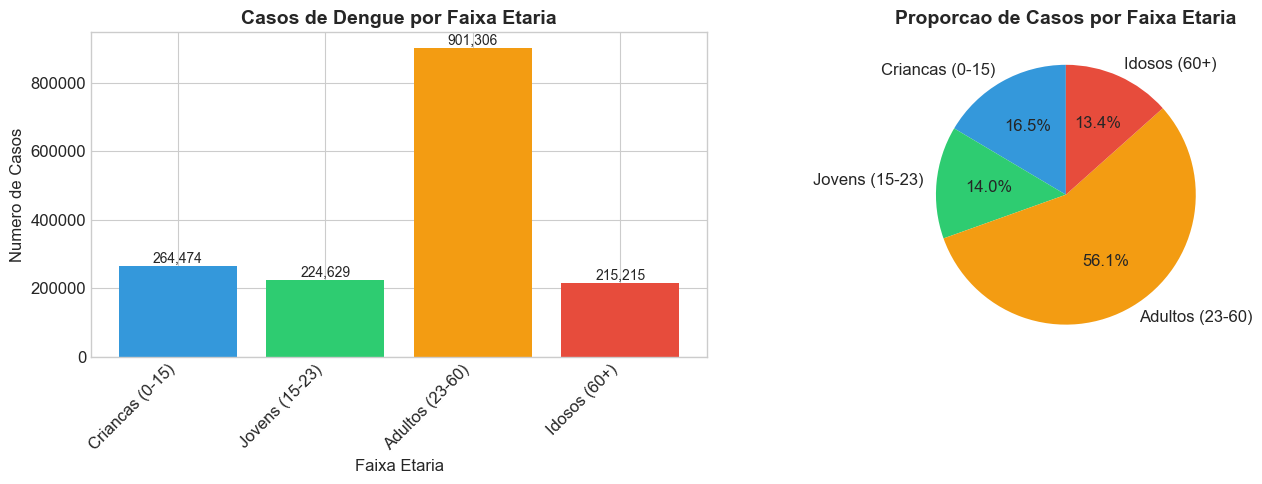


Total de casos analisados (excluindo 'Nao informado'): 1,605,624


In [16]:
# =============================================================================
# VISUALIZACAO DA DISTRIBUICAO POR FAIXA ETARIA
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Ordenar as faixas etarias (sem acentos para consistencia)
ordem_faixas = ['Criancas (0-15)', 'Jovens (15-23)', 'Adultos (23-60)', 'Idosos (60+)']
contagem_ordenada = df['FAIXA_ETARIA'].value_counts().reindex(
    [f for f in ordem_faixas if f in df['FAIXA_ETARIA'].value_counts().index]
)

# Cores para cada faixa
colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']

# Grafico de barras
bars = axes[0].bar(range(len(contagem_ordenada)), contagem_ordenada.values, color=colors[:len(contagem_ordenada)])
axes[0].set_xticks(range(len(contagem_ordenada)))
axes[0].set_xticklabels(contagem_ordenada.index, rotation=45, ha='right')
axes[0].set_title('Casos de Dengue por Faixa Etaria', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Faixa Etaria')
axes[0].set_ylabel('Numero de Casos')

# Adicionar valores nas barras
for i, v in enumerate(contagem_ordenada.values):
    axes[0].text(i, v + max(contagem_ordenada.values)*0.01, f'{v:,}', ha='center', fontsize=10)

# Grafico de pizza (excluindo "Nao informado")
contagem_sem_na = contagem_ordenada[contagem_ordenada.index != 'Nao informado']
axes[1].pie(contagem_sem_na.values, labels=contagem_sem_na.index, autopct='%1.1f%%', 
            colors=colors[:len(contagem_sem_na)], startangle=90)
axes[1].set_title('Proporcao de Casos por Faixa Etaria', fontsize=14, fontweight='bold')

plt.tight_layout()

# Salvar grafico
fig.savefig('GRAFICOS/01_casos_faixa_etaria.png', dpi=150, bbox_inches='tight', facecolor='white')
print("Grafico salvo em: GRAFICOS/01_casos_faixa_etaria.png")

plt.show()

print(f"\nTotal de casos analisados (excluindo 'Nao informado'): {contagem_sem_na.sum():,}")

## 4. Análise de Sintomas por Faixa Etária

Identificando os sintomas mais comuns em cada faixa etária

In [17]:
# Identificar colunas de sintomas (geralmente começam com FEBRE, DOR, NAUSEA, etc.)
# No SINAN, os sintomas geralmente são codificados como 1=Sim, 2=Não

# Possíveis colunas de sintomas no dataset de dengue
sintomas_possiveis = ['FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 
                      'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N',
                      'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 
                      'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE']

# Verificar quais colunas de sintomas existem no dataset
colunas_sintomas = [col for col in df.columns if col in sintomas_possiveis or 
                    any(sint in col.upper() for sint in ['FEBRE', 'DOR', 'VOMIT', 'NAUSEA', 'CEFALEIA'])]

print("Colunas de sintomas encontradas:")
print(colunas_sintomas)

# Se não encontrar as colunas padrão, buscar por padrões comuns
if not colunas_sintomas:
    colunas_sintomas = [col for col in df.columns if df[col].isin([1, 2]).sum() > len(df)*0.5][:15]
    print("\nColunas identificadas como possíveis sintomas (valores 1/2):")
    print(colunas_sintomas)

Colunas de sintomas encontradas:
['FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE']


In [18]:
# =============================================================================
# ANALISAR SINTOMAS POR FAIXA ETARIA
# =============================================================================

df_valido = df[df['FAIXA_ETARIA'] != 'Nao informado'].copy()

traducao_sintomas = {
    'FEBRE': 'Febre', 'MIALGIA': 'Dor muscular', 'CEFALEIA': 'Dor de cabeca',
    'EXANTEMA': 'Manchas na pele', 'VOMITO': 'Vomito', 'NAUSEA': 'Nausea',
    'DOR_COSTAS': 'Dor nas costas', 'CONJUNTVIT': 'Conjuntivite', 'ARTRITE': 'Artrite',
    'ARTRALGIA': 'Dor nas articulacoes', 'PETEQUIA_N': 'Petequias', 'LEUCOPENIA': 'Leucopenia',
    'LACO': 'Prova do laco', 'DOR_RETRO': 'Dor retro-orbital', 'DIABETES': 'Diabetes',
    'HEMATOLOG': 'Doenca hematologica', 'HEPATOPAT': 'Hepatopatia', 'RENAL': 'Doenca renal',
    'HIPERTENSA': 'Hipertensao', 'ACIDO_PEPT': 'Doenca acido-peptica', 'AUTO_IMUNE': 'Doenca autoimune'
}

sintomas_por_faixa = {}
faixas = ['Criancas (0-15)', 'Jovens (15-23)', 'Adultos (23-60)', 'Idosos (60+)']

print(f"Analisando sintomas por faixa etaria...")
print(f"Total de registros validos: {len(df_valido):,}")

for faixa in faixas:
    df_faixa = df_valido[df_valido['FAIXA_ETARIA'] == faixa]
    print(f"  {faixa}: {len(df_faixa):,} registros")
    sintomas_faixa = {}
    
    for col in colunas_sintomas:
        if col in df.columns:
            total_com_sintoma = (df_faixa[col] == 1).sum()
            total_validos = df_faixa[col].isin([1, 2]).sum()
            
            if total_validos > 0:
                percentual = (total_com_sintoma / total_validos) * 100
                nome_sintoma = traducao_sintomas.get(col, col)
                sintomas_faixa[nome_sintoma] = percentual
    
    sintomas_por_faixa[faixa] = sintomas_faixa

df_sintomas = pd.DataFrame(sintomas_por_faixa).round(2)
print("\nFrequencia de Sintomas por Faixa Etaria (%):")
print("=" * 60)
df_sintomas

Analisando sintomas por faixa etaria...
Total de registros validos: 1,605,624
  Criancas (0-15): 264,474 registros
  Jovens (15-23): 224,629 registros
  Jovens (15-23): 224,629 registros
  Adultos (23-60): 901,306 registros
  Adultos (23-60): 901,306 registros
  Idosos (60+): 215,215 registros

Frequencia de Sintomas por Faixa Etaria (%):
  Idosos (60+): 215,215 registros

Frequencia de Sintomas por Faixa Etaria (%):


,Criancas (0-15),Jovens (15-23),Adultos (23-60),Idosos (60+)
Febre,92.75,88.43,85.74,77.70
Dor muscular,65.19,83.26,84.74,80.31
Dor de cabeca,69.72,85.85,84.09,73.65
Manchas na pele,11.35,7.33,8.21,6.39
Vomito,34.47,30.22,24.71,23.11
Nausea,37.47,46.93,45.03,42.55
Dor nas costas,15.26,29.82,32.65,30.14
Conjuntivite,2.87,3.09,3.33,2.75
Artrite,5.23,9.04,11.17,10.79
Dor nas articulacoes,8.51,15.98,19.70,17.15


In [19]:
# Top 5 sintomas mais comuns por faixa etária
print("Top 5 Sintomas Mais Comuns por Faixa Etária:")
print("=" * 60)

for faixa in faixas:
    if faixa in df_sintomas.columns:
        top_10 = df_sintomas[faixa].dropna().sort_values(ascending=False).head(10)
        print(f"\n* {faixa}:")
        for i, (sintoma, percentual) in enumerate(top_10.items(), 1):
            print(f"   {i}. {sintoma}: {percentual:.1f}%")

Top 5 Sintomas Mais Comuns por Faixa Etária:

* Criancas (0-15):
   1. Febre: 92.8%
   2. Dor de cabeca: 69.7%
   3. Dor muscular: 65.2%
   4. Nausea: 37.5%
   5. Vomito: 34.5%
   6. Dor retro-orbital: 20.6%
   7. Dor nas costas: 15.3%
   8. Manchas na pele: 11.3%
   9. Dor nas articulacoes: 8.5%
   10. Petequias: 7.2%

* Jovens (15-23):
   1. Febre: 88.4%
   2. Dor de cabeca: 85.8%
   3. Dor muscular: 83.3%
   4. Nausea: 46.9%
   5. Dor retro-orbital: 35.8%
   6. Vomito: 30.2%
   7. Dor nas costas: 29.8%
   8. Dor nas articulacoes: 16.0%
   9. Artrite: 9.0%
   10. Manchas na pele: 7.3%

* Adultos (23-60):
   1. Febre: 85.7%
   2. Dor muscular: 84.7%
   3. Dor de cabeca: 84.1%
   4. Nausea: 45.0%
   5. Dor retro-orbital: 34.5%
   6. Dor nas costas: 32.6%
   7. Vomito: 24.7%
   8. Dor nas articulacoes: 19.7%
   9. Artrite: 11.2%
   10. Hipertensao: 9.8%

* Idosos (60+):
   1. Dor muscular: 80.3%
   2. Febre: 77.7%
   3. Dor de cabeca: 73.7%
   4. Nausea: 42.5%
   5. Hipertensao: 34.6%
 

Grafico salvo em: GRAFICOS/02_heatmap_sintomas.png


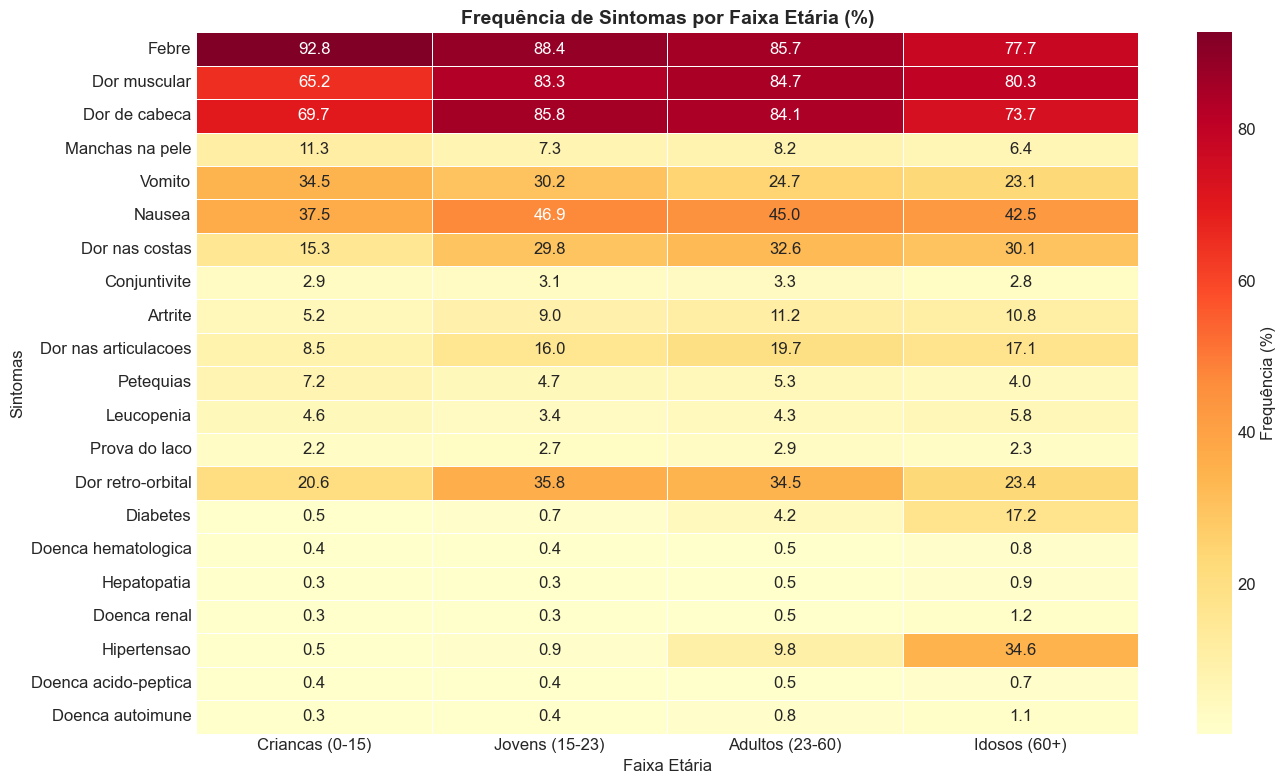

In [20]:
# Visualização: Heatmap de sintomas por faixa etária
if not df_sintomas.empty:
    fig = plt.figure(figsize=(14, 8))
    
    # Remover linhas com todos NaN
    df_heatmap = df_sintomas.dropna(how='all')
    
    if not df_heatmap.empty:
        sns.heatmap(df_heatmap, annot=True, fmt='.1f', cmap='YlOrRd', 
                    linewidths=0.5, cbar_kws={'label': 'Frequência (%)'})
        plt.title('Frequência de Sintomas por Faixa Etária (%)', fontsize=14, fontweight='bold')
        plt.xlabel('Faixa Etária')
        plt.ylabel('Sintomas')
        plt.tight_layout()
        
        # Salvar grafico
        fig.savefig('GRAFICOS/02_heatmap_sintomas.png', dpi=150, bbox_inches='tight', facecolor='white')
        print("Grafico salvo em: GRAFICOS/02_heatmap_sintomas.png")
        
        plt.show()
    else:
        print("Não há dados suficientes para gerar o heatmap de sintomas.")

## 5. Análise de Casos por Região e Faixa Etária

Identificando qual faixa etária é mais atingida em cada região do Brasil

In [21]:
# Identificar coluna de UF ou região
colunas_uf = [col for col in df.columns if 'UF' in col.upper() or 'ESTADO' in col.upper() or 'SG_UF' in col.upper()]
print("Colunas relacionadas a UF/Estado encontradas:")
print(colunas_uf)

# Verificar valores únicos
for col in colunas_uf[:3]:
    print(f"\nColuna {col} - Valores únicos: {df[col].nunique()}")
    print(df[col].value_counts().head(10))

Colunas relacionadas a UF/Estado encontradas:
['SG_UF_NOT', 'SG_UF', 'UF', 'COUFINF', 'GRAV_INSUF']

Coluna SG_UF_NOT - Valores únicos: 27
SG_UF_NOT
35    898371
31    162384
41    109285
52     98296
43     84707
51     34970
29     31172
33     29321
42     26061
26     21642
Name: count, dtype: int64

Coluna SG_UF - Valores únicos: 27
SG_UF
35    897256
31    162995
41    109237
52     98239
43     84684
51     35102
29     31387
33     29472
42     25647
26     21585
Name: count, dtype: int64

Coluna UF - Valores únicos: 27
UF
35.0    32893
41.0     6342
31.0     5566
52.0     4889
29.0     2123
51.0     1911
15.0     1403
26.0     1378
33.0     1141
43.0     1064
Name: count, dtype: int64

Coluna SG_UF - Valores únicos: 27
SG_UF
35    897256
31    162995
41    109237
52     98239
43     84684
51     35102
29     31387
33     29472
42     25647
26     21585
Name: count, dtype: int64

Coluna UF - Valores únicos: 27
UF
35.0    32893
41.0     6342
31.0     5566
52.0     4889
29.0     

In [22]:
# Mapeamento de UF para regioes
uf_para_regiao = {
    11: 'Norte', 12: 'Norte', 13: 'Norte', 14: 'Norte', 15: 'Norte', 16: 'Norte', 17: 'Norte',
    21: 'Nordeste', 22: 'Nordeste', 23: 'Nordeste', 24: 'Nordeste', 25: 'Nordeste', 
    26: 'Nordeste', 27: 'Nordeste', 28: 'Nordeste', 29: 'Nordeste',
    31: 'Sudeste', 32: 'Sudeste', 33: 'Sudeste', 35: 'Sudeste',
    41: 'Sul', 42: 'Sul', 43: 'Sul',
    50: 'Centro-Oeste', 51: 'Centro-Oeste', 52: 'Centro-Oeste', 53: 'Centro-Oeste'
}

sigla_para_regiao = {
    'RO': 'Norte', 'AC': 'Norte', 'AM': 'Norte', 'RR': 'Norte', 'PA': 'Norte', 'AP': 'Norte', 'TO': 'Norte',
    'MA': 'Nordeste', 'PI': 'Nordeste', 'CE': 'Nordeste', 'RN': 'Nordeste', 'PB': 'Nordeste',
    'PE': 'Nordeste', 'AL': 'Nordeste', 'SE': 'Nordeste', 'BA': 'Nordeste',
    'MG': 'Sudeste', 'ES': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'SC': 'Sul', 'RS': 'Sul',
    'MS': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'DF': 'Centro-Oeste'
}

coluna_uf = None
for col in ['SG_UF_NOT', 'SG_UF', 'UF_NOT', 'UF']:
    if col in df.columns:
        coluna_uf = col
        break

if coluna_uf is None and colunas_uf:
    coluna_uf = colunas_uf[0]

print(f"Coluna de UF utilizada: {coluna_uf}")

if coluna_uf:
    # Converter para numerico antes de mapear (necessario pois a coluna foi convertida para category)
    uf_valores = pd.to_numeric(df[coluna_uf].astype(str), errors='coerce')
    
    # Verificar se sao codigos numericos ou siglas
    if uf_valores.notna().sum() > 0 and uf_valores.max() > 10:
        df['REGIAO'] = uf_valores.map(uf_para_regiao)
        print(f"Mapeamento usando codigos numericos de UF")
    else:
        df['REGIAO'] = df[coluna_uf].astype(str).map(sigla_para_regiao)
        print(f"Mapeamento usando siglas de UF")
    
    print("\nDistribuicao por Regiao:")
    print(df['REGIAO'].value_counts())

Coluna de UF utilizada: SG_UF_NOT
Mapeamento usando codigos numericos de UF

Distribuicao por Regiao:
REGIAO
Sudeste         1090138
Sul              220053
Centro-Oeste     157737
Nordeste          98501
Norte             39195
Name: count, dtype: int64
Mapeamento usando codigos numericos de UF

Distribuicao por Regiao:
REGIAO
Sudeste         1090138
Sul              220053
Centro-Oeste     157737
Nordeste          98501
Norte             39195
Name: count, dtype: int64


In [23]:
df_regiao_valido = df[(df['FAIXA_ETARIA'] != 'Nao informado') & (df['REGIAO'].notna())].copy()

tabela_regiao_faixa = pd.crosstab(df_regiao_valido['REGIAO'], df_regiao_valido['FAIXA_ETARIA'])

ordem_colunas = ['Criancas (0-15)', 'Jovens (15-23)', 'Adultos (23-60)', 'Idosos (60+)']
tabela_regiao_faixa = tabela_regiao_faixa[[col for col in ordem_colunas if col in tabela_regiao_faixa.columns]]

print("Numero de Casos por Regiao e Faixa Etaria:")
print("=" * 70)
tabela_regiao_faixa

Numero de Casos por Regiao e Faixa Etaria:


FAIXA_ETARIA,Criancas (0-15),Jovens (15-23),Adultos (23-60),Idosos (60+)
REGIAO,,,,
Centro-Oeste,31926,24900,83697,17214
Nordeste,26969,17816,47961,5755
Norte,9898,6439,19870,2988
Sudeste,160578,145184,626762,157614
Sul,35103,30290,123016,31644


In [24]:
# Identificar a faixa etária mais atingida em cada região
print("Faixa Etária Mais Atingida por Região:")
print("=" * 60)

for regiao in tabela_regiao_faixa.index:
    faixa_mais_atingida = tabela_regiao_faixa.loc[regiao].idxmax()
    total_casos = tabela_regiao_faixa.loc[regiao].max()
    percentual = (total_casos / tabela_regiao_faixa.loc[regiao].sum()) * 100
    print(f"* {regiao}: {faixa_mais_atingida} ({total_casos:,} casos - {percentual:.1f}%)")

Faixa Etária Mais Atingida por Região:
* Centro-Oeste: Adultos (23-60) (83,697 casos - 53.1%)
* Nordeste: Adultos (23-60) (47,961 casos - 48.7%)
* Norte: Adultos (23-60) (19,870 casos - 50.7%)
* Sudeste: Adultos (23-60) (626,762 casos - 57.5%)
* Sul: Adultos (23-60) (123,016 casos - 55.9%)


Grafico salvo em: GRAFICOS/03_heatmap_regiao_faixa.png


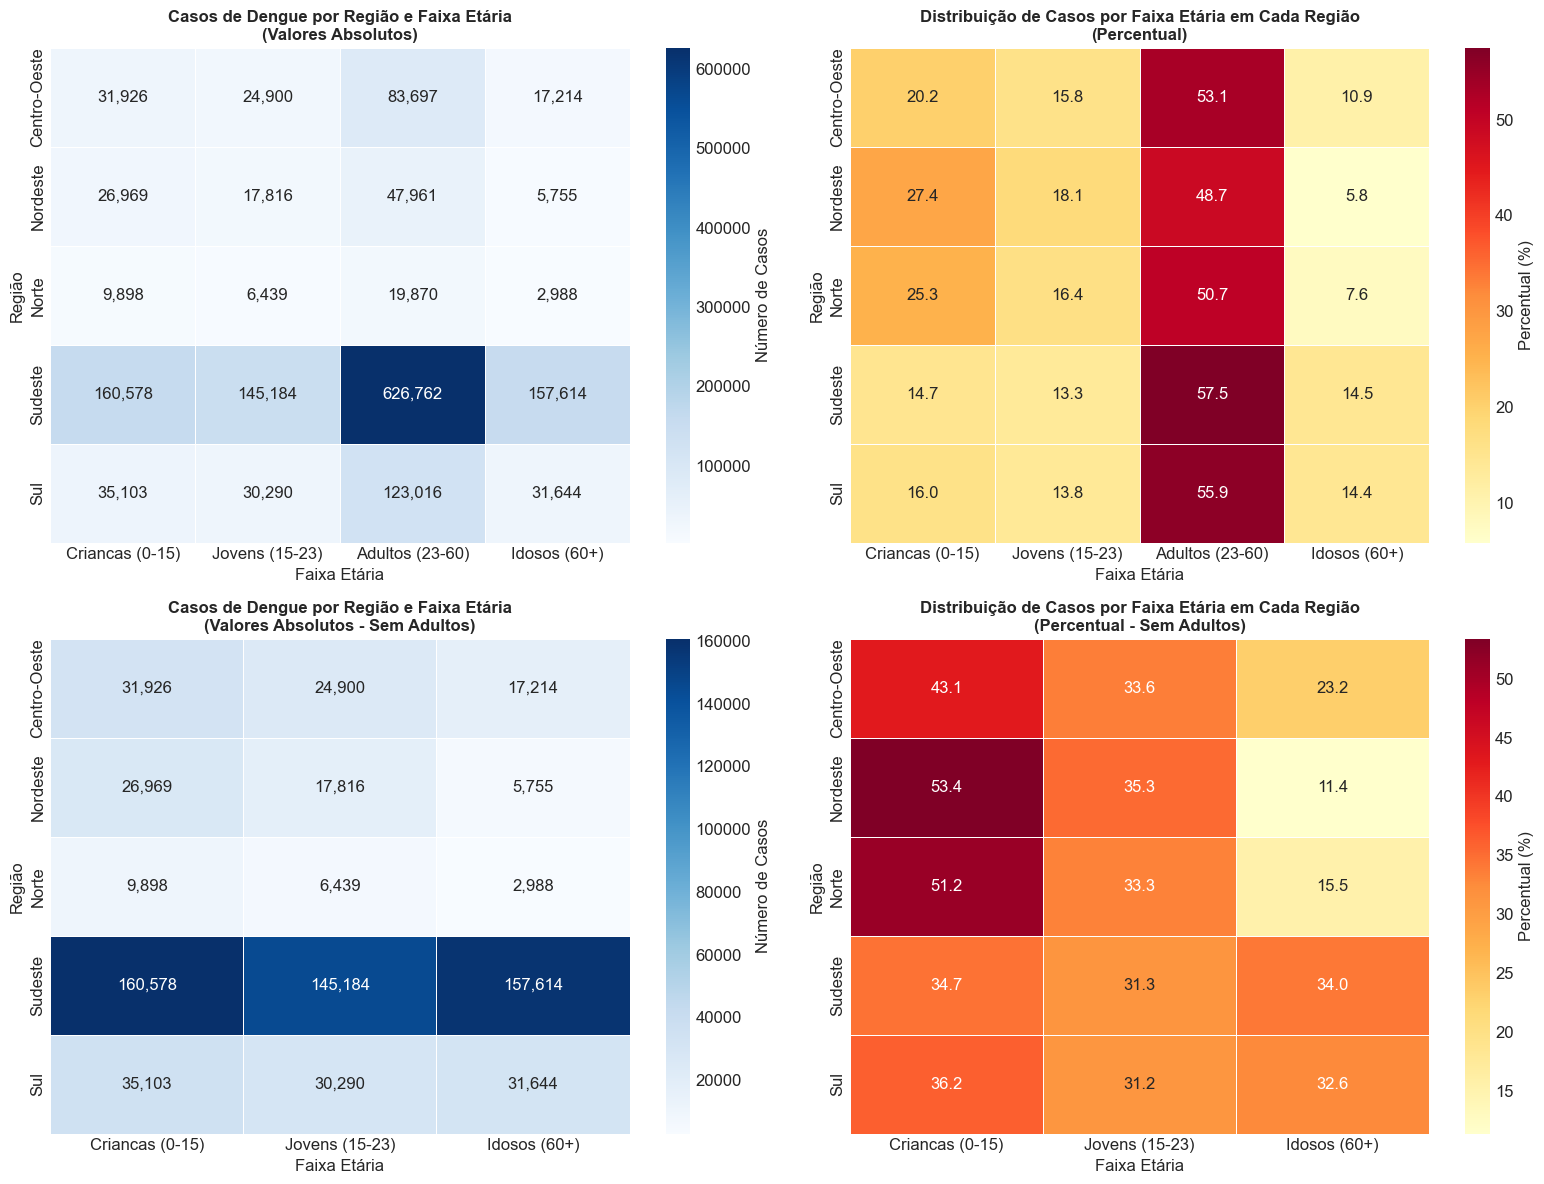

In [25]:
# Visualização: Heatmap de casos por região e faixa etária
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Heatmap com valores absolutos (todas as faixas)
sns.heatmap(tabela_regiao_faixa, annot=True, fmt=',d', cmap='Blues', 
            ax=axes[0, 0], linewidths=0.5, cbar_kws={'label': 'Número de Casos'})
axes[0, 0].set_title('Casos de Dengue por Região e Faixa Etária\n(Valores Absolutos)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Faixa Etária')
axes[0, 0].set_ylabel('Região')

# Heatmap com percentuais (por região) - todas as faixas
tabela_percentual = tabela_regiao_faixa.div(tabela_regiao_faixa.sum(axis=1), axis=0) * 100
sns.heatmap(tabela_percentual, annot=True, fmt='.1f', cmap='YlOrRd', 
            ax=axes[0, 1], linewidths=0.5, cbar_kws={'label': 'Percentual (%)'})
axes[0, 1].set_title('Distribuição de Casos por Faixa Etária em Cada Região\n(Percentual)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Faixa Etária')
axes[0, 1].set_ylabel('Região')

# Filtrar tabela excluindo adultos
colunas_sem_adultos = [col for col in tabela_regiao_faixa.columns if 'Adultos' not in col]
tabela_sem_adultos = tabela_regiao_faixa[colunas_sem_adultos]

# Heatmap com valores absolutos (sem adultos)
sns.heatmap(tabela_sem_adultos, annot=True, fmt=',d', cmap='Blues', 
            ax=axes[1, 0], linewidths=0.5, cbar_kws={'label': 'Número de Casos'})
axes[1, 0].set_title('Casos de Dengue por Região e Faixa Etária\n(Valores Absolutos - Sem Adultos)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Faixa Etária')
axes[1, 0].set_ylabel('Região')

# Heatmap com percentuais (por região) - sem adultos
tabela_percentual_sem_adultos = tabela_sem_adultos.div(tabela_sem_adultos.sum(axis=1), axis=0) * 100
sns.heatmap(tabela_percentual_sem_adultos, annot=True, fmt='.1f', cmap='YlOrRd', 
            ax=axes[1, 1], linewidths=0.5, cbar_kws={'label': 'Percentual (%)'})
axes[1, 1].set_title('Distribuição de Casos por Faixa Etária em Cada Região\n(Percentual - Sem Adultos)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Faixa Etária')
axes[1, 1].set_ylabel('Região')

plt.tight_layout()

# Salvar grafico
fig.savefig('GRAFICOS/03_heatmap_regiao_faixa.png', dpi=150, bbox_inches='tight', facecolor='white')
print("Grafico salvo em: GRAFICOS/03_heatmap_regiao_faixa.png")

plt.show()

Grafico salvo em: GRAFICOS/04_barras_regiao_faixa.png


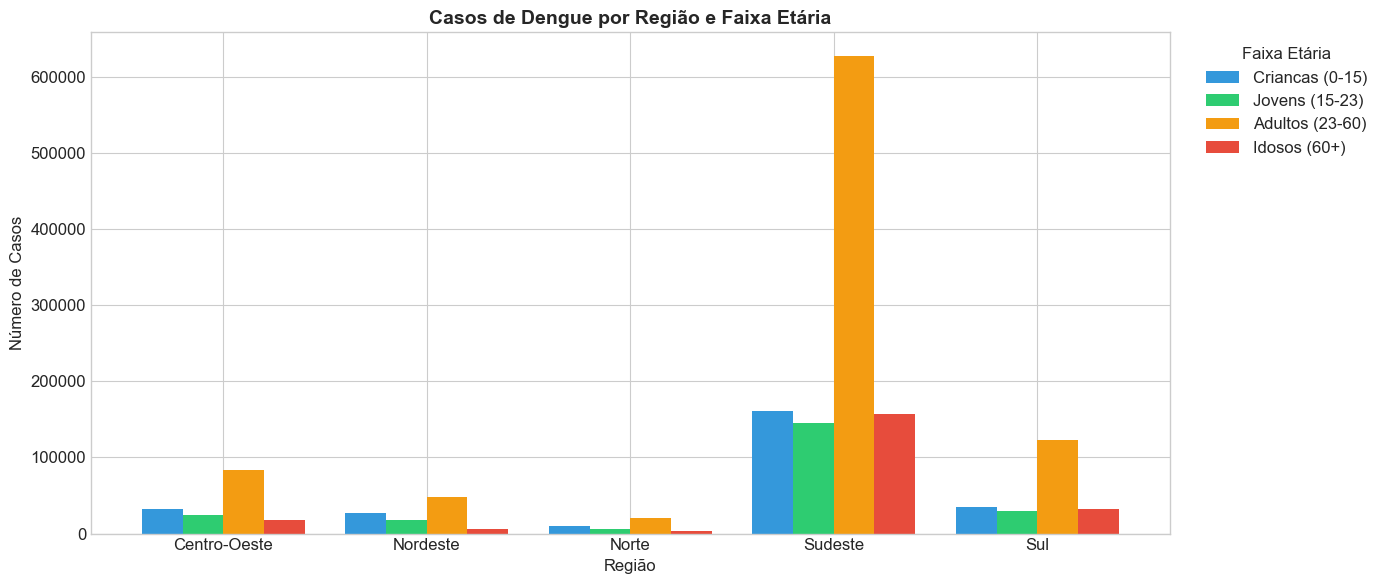

In [26]:
# Gráfico de barras agrupadas por região
fig, ax = plt.subplots(figsize=(14, 6))
tabela_regiao_faixa.plot(kind='bar', ax=ax, width=0.8, 
                          color=['#3498db', '#2ecc71', '#f39c12', '#e74c3c'])
plt.title('Casos de Dengue por Região e Faixa Etária', fontsize=14, fontweight='bold')
plt.xlabel('Região')
plt.ylabel('Número de Casos')
plt.legend(title='Faixa Etária', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()

# Salvar grafico
fig.savefig('GRAFICOS/04_barras_regiao_faixa.png', dpi=150, bbox_inches='tight', facecolor='white')
print("Grafico salvo em: GRAFICOS/04_barras_regiao_faixa.png")

plt.show()

## 6. Análise de Mortalidade por Faixa Etária

Identificando qual faixa etária teve mais óbitos por dengue no Brasil

In [27]:
# Identificar coluna de evolução/óbito
# No SINAN, geralmente a coluna EVOLUCAO indica o desfecho:
# 1 = Cura, 2 = Óbito pelo agravo, 3 = Óbito por outras causas, 9 = Ignorado

colunas_obito = [col for col in df.columns if 'EVOLU' in col.upper() or 'OBITO' in col.upper() or 'MORTE' in col.upper()]
print("Colunas relacionadas a evolução/óbito encontradas:")
print(colunas_obito)

# Verificar valores
for col in colunas_obito[:3]:
    print(f"\nColuna {col}:")
    print(df[col].value_counts())

Colunas relacionadas a evolução/óbito encontradas:
['EVOLUCAO', 'DT_OBITO']

Coluna EVOLUCAO:
EVOLUCAO
1.0    1297933
9.0      35690
2.0       1729
3.0        449
4.0        252
Name: count, dtype: int64

Coluna DT_OBITO:
DT_OBITO
2025-03-16    31
2025-03-18    30
2025-03-20    27
2025-04-10    27
2025-03-25    25
              ..
2025-11-09     1
2025-09-14     1
2025-08-31     1
2025-11-18     1
2025-08-15     1
Name: count, Length: 308, dtype: int64


In [28]:
coluna_evolucao = None
for col in ['EVOLUCAO', 'EVOLU', 'EVOLUCAO_CASO']:
    if col in df.columns:
        coluna_evolucao = col
        break

if coluna_evolucao is None and colunas_obito:
    coluna_evolucao = colunas_obito[0]

print(f"Coluna de evolucao utilizada: {coluna_evolucao}")

if coluna_evolucao:
    df['OBITO'] = df[coluna_evolucao].isin([2, 3])
    
    print(f"\nTotal de obitos registrados: {df['OBITO'].sum():,}")
    print(f"Taxa de mortalidade geral: {(df['OBITO'].sum() / len(df) * 100):.4f}%")

Coluna de evolucao utilizada: EVOLUCAO

Total de obitos registrados: 2,178
Taxa de mortalidade geral: 0.1356%


In [29]:
df_obitos = df[df['FAIXA_ETARIA'] != 'Nao informado'].copy()

obitos_por_faixa = df_obitos.groupby('FAIXA_ETARIA')['OBITO'].agg(['sum', 'count'])
obitos_por_faixa.columns = ['Total_Obitos', 'Total_Casos']
obitos_por_faixa['Taxa_Mortalidade_%'] = (obitos_por_faixa['Total_Obitos'] / obitos_por_faixa['Total_Casos'] * 100).round(4)

ordem = ['Criancas (0-15)', 'Jovens (15-23)', 'Adultos (23-60)', 'Idosos (60+)']
obitos_por_faixa = obitos_por_faixa.reindex([f for f in ordem if f in obitos_por_faixa.index])

print("Analise de Mortalidade por Faixa Etaria:")
print("=" * 70)
obitos_por_faixa

Analise de Mortalidade por Faixa Etaria:


,Total_Obitos,Total_Casos,Taxa_Mortalidade_%
FAIXA_ETARIA,,,
Criancas (0-15),81,264474,0.0306
Jovens (15-23),62,224629,0.0276
Adultos (23-60),738,901306,0.0819
Idosos (60+),1297,215215,0.6027


In [30]:
# Identificar a faixa etária com mais óbitos
faixa_mais_obitos = obitos_por_faixa['Total_Obitos'].idxmax()
total_obitos_faixa = obitos_por_faixa['Total_Obitos'].max()
percentual_obitos = (total_obitos_faixa / obitos_por_faixa['Total_Obitos'].sum() * 100)

print("=" * 70)
print(f">>> FAIXA ETARIA COM MAIS OBITOS: {faixa_mais_obitos}")
print(f"   Total de obitos: {total_obitos_faixa:,}")
print(f"   Percentual do total de obitos: {percentual_obitos:.1f}%")
print("=" * 70)

# Faixa com maior taxa de mortalidade
faixa_maior_taxa = obitos_por_faixa['Taxa_Mortalidade_%'].idxmax()
maior_taxa = obitos_por_faixa['Taxa_Mortalidade_%'].max()

print(f"\n>>> FAIXA ETARIA COM MAIOR TAXA DE MORTALIDADE: {faixa_maior_taxa}")
print(f"   Taxa de mortalidade: {maior_taxa:.4f}%")

>>> FAIXA ETARIA COM MAIS OBITOS: Idosos (60+)
   Total de obitos: 1,297
   Percentual do total de obitos: 59.6%

>>> FAIXA ETARIA COM MAIOR TAXA DE MORTALIDADE: Idosos (60+)
   Taxa de mortalidade: 0.6027%


Grafico salvo em: GRAFICOS/05_mortalidade_faixa.png


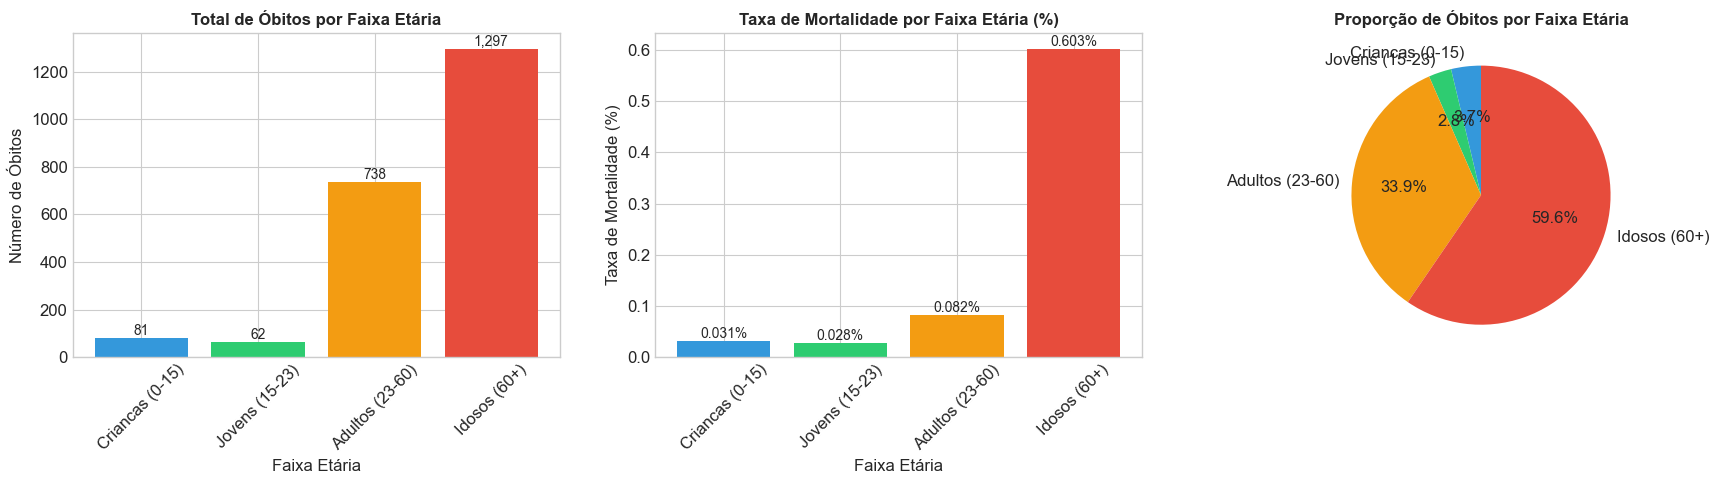

In [31]:
# Visualização de mortalidade
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']

# Gráfico 1: Total de óbitos por faixa etária
axes[0].bar(obitos_por_faixa.index, obitos_por_faixa['Total_Obitos'], color=colors)
axes[0].set_title('Total de Óbitos por Faixa Etária', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Faixa Etária')
axes[0].set_ylabel('Número de Óbitos')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(obitos_por_faixa['Total_Obitos']):
    axes[0].text(i, v + max(obitos_por_faixa['Total_Obitos'])*0.01, f'{v:,}', ha='center', fontsize=10)

# Gráfico 2: Taxa de mortalidade por faixa etária
axes[1].bar(obitos_por_faixa.index, obitos_por_faixa['Taxa_Mortalidade_%'], color=colors)
axes[1].set_title('Taxa de Mortalidade por Faixa Etária (%)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Faixa Etária')
axes[1].set_ylabel('Taxa de Mortalidade (%)')
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(obitos_por_faixa['Taxa_Mortalidade_%']):
    axes[1].text(i, v + max(obitos_por_faixa['Taxa_Mortalidade_%'])*0.01, f'{v:.3f}%', ha='center', fontsize=10)

# Gráfico 3: Proporção de óbitos
axes[2].pie(obitos_por_faixa['Total_Obitos'], labels=obitos_por_faixa.index, 
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[2].set_title('Proporção de Óbitos por Faixa Etária', fontsize=12, fontweight='bold')

plt.tight_layout()

# Salvar grafico
fig.savefig('GRAFICOS/05_mortalidade_faixa.png', dpi=150, bbox_inches='tight', facecolor='white')
print("Grafico salvo em: GRAFICOS/05_mortalidade_faixa.png")

plt.show()

## 7. Resumo Final da Análise

In [32]:
# Resumo completo da analise
print("=" * 80)
print("                    RESUMO DA ANALISE DE DENGUE NO BRASIL")
print("=" * 80)

print(f"\n[DATASET]")
print(f"   - Total de registros: {len(df):,}")
print(f"   - Periodo: 2025")

print(f"\n[DISTRIBUICAO POR FAIXA ETARIA]")
for faixa in ['Criancas (0-15)', 'Jovens (15-23)', 'Adultos (23-60)', 'Idosos (60+)']:
    if faixa in contagem_faixa.index:
        casos = contagem_faixa[faixa]
        pct = (casos / contagem_faixa.sum() * 100)
        print(f"   - {faixa}: {casos:,} casos ({pct:.1f}%)")

print(f"\n[SINTOMAS MAIS COMUNS POR FAIXA ETARIA]")
faixas_resumo = ['Criancas (0-15)', 'Jovens (15-23)', 'Adultos (23-60)', 'Idosos (60+)']
for faixa in faixas_resumo:
    if faixa in df_sintomas.columns and not df_sintomas[faixa].dropna().empty:
        top_sintoma = df_sintomas[faixa].dropna().idxmax()
        pct = df_sintomas[faixa].max()
        print(f"   - {faixa}: {top_sintoma} ({pct:.1f}%)")
    else:
        print(f"   - {faixa}: Dados nao disponiveis")

print(f"\n[FAIXA ETARIA MAIS ATINGIDA POR REGIAO]")
for regiao in tabela_regiao_faixa.index:
    faixa = tabela_regiao_faixa.loc[regiao].idxmax()
    casos = tabela_regiao_faixa.loc[regiao].max()
    print(f"   - {regiao}: {faixa} ({casos:,} casos)")

print(f"\n[MORTALIDADE]")
print(f"   - Total de obitos: {obitos_por_faixa['Total_Obitos'].sum():,}")
print(f"   - Faixa com mais obitos: {faixa_mais_obitos} ({total_obitos_faixa:,} obitos)")
print(f"   - Faixa com maior taxa de mortalidade: {faixa_maior_taxa} ({maior_taxa:.4f}%)")

print("\n" + "=" * 80)

                    RESUMO DA ANALISE DE DENGUE NO BRASIL

[DATASET]
   - Total de registros: 1,605,624
   - Periodo: 2025

[DISTRIBUICAO POR FAIXA ETARIA]
   - Criancas (0-15): 264,474 casos (16.5%)
   - Jovens (15-23): 224,629 casos (14.0%)
   - Adultos (23-60): 901,306 casos (56.1%)
   - Idosos (60+): 215,215 casos (13.4%)

[SINTOMAS MAIS COMUNS POR FAIXA ETARIA]
   - Criancas (0-15): Febre (92.8%)
   - Jovens (15-23): Febre (88.4%)
   - Adultos (23-60): Febre (85.7%)
   - Idosos (60+): Dor muscular (80.3%)

[FAIXA ETARIA MAIS ATINGIDA POR REGIAO]
   - Centro-Oeste: Adultos (23-60) (83,697 casos)
   - Nordeste: Adultos (23-60) (47,961 casos)
   - Norte: Adultos (23-60) (19,870 casos)
   - Sudeste: Adultos (23-60) (626,762 casos)
   - Sul: Adultos (23-60) (123,016 casos)

[MORTALIDADE]
   - Total de obitos: 2,178
   - Faixa com mais obitos: Idosos (60+) (1,297 obitos)
   - Faixa com maior taxa de mortalidade: Idosos (60+) (0.6027%)



Grafico salvo em: GRAFICOS/06_dashboard_final.png


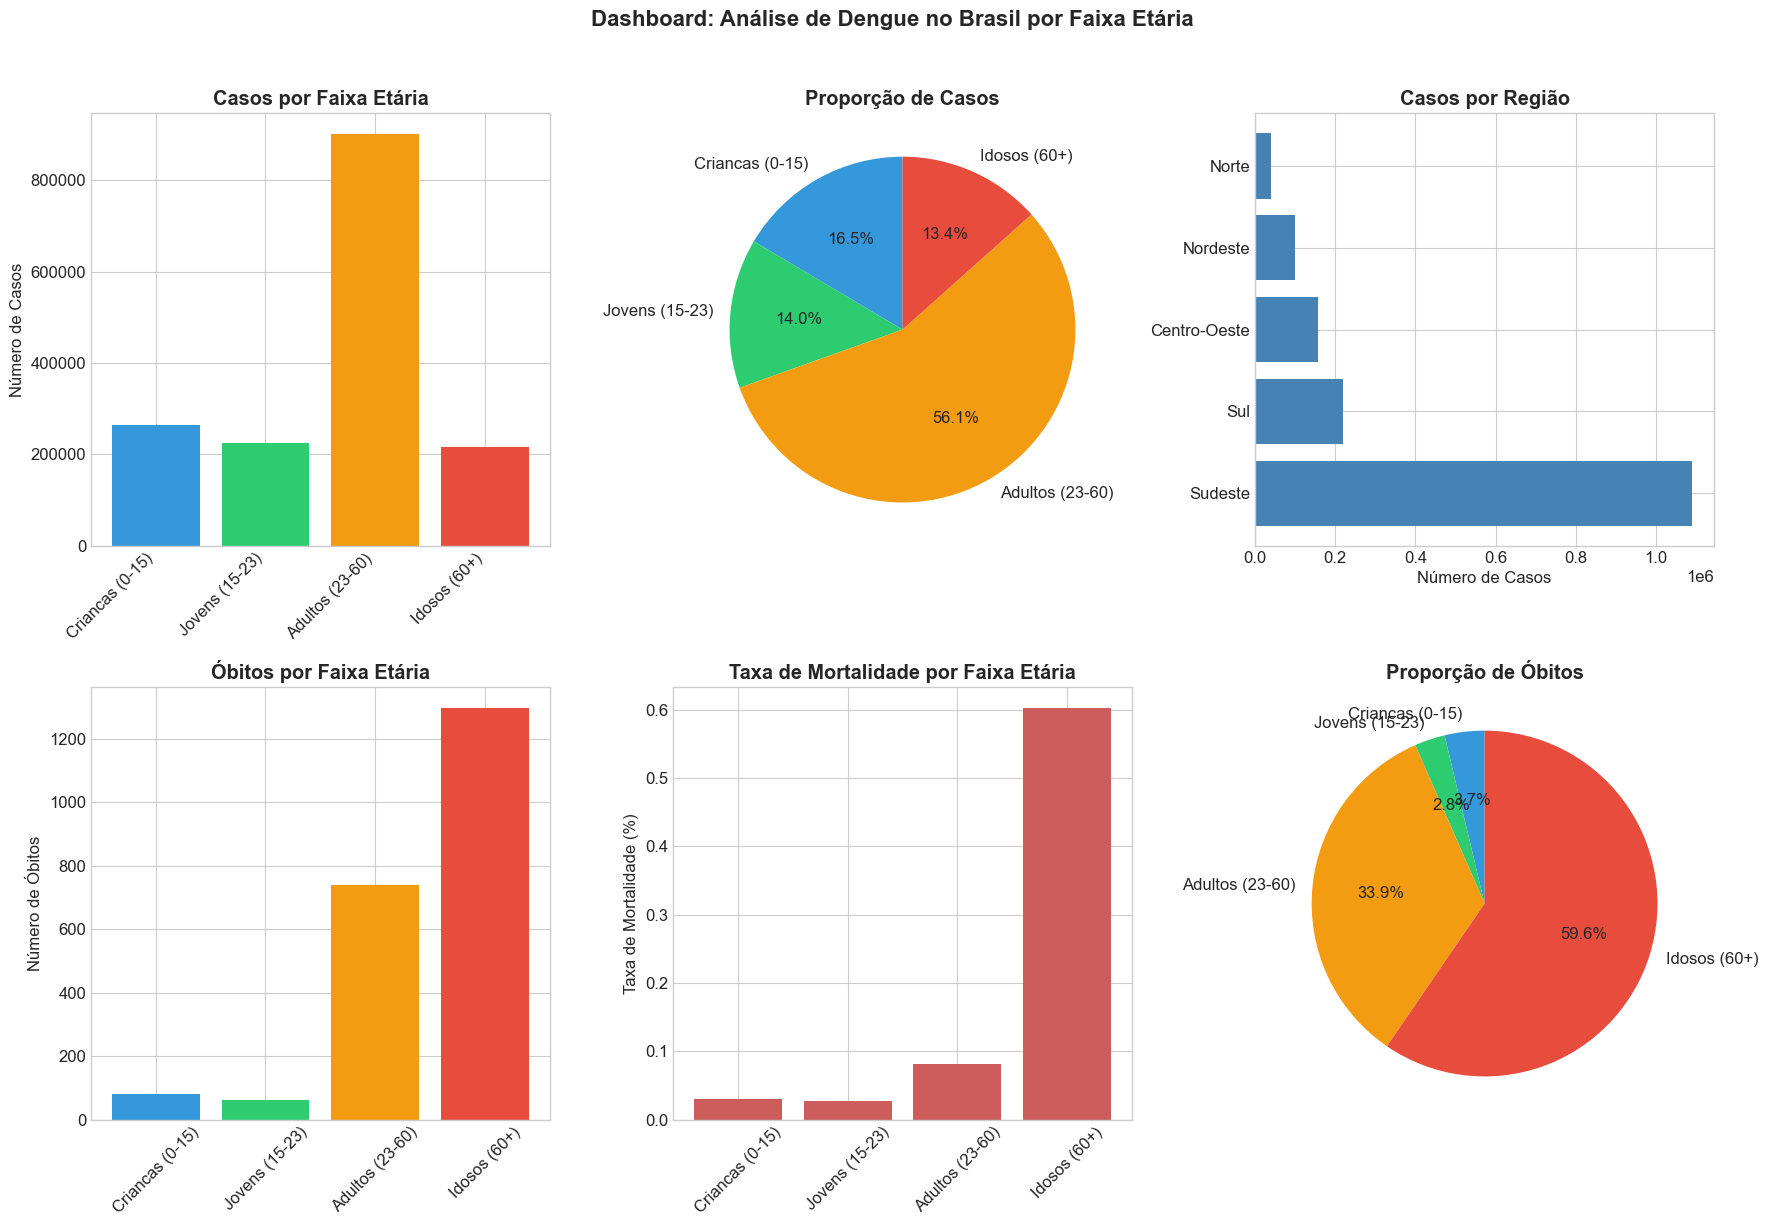

In [33]:
# Dashboard final com todos os principais graficos
fig = plt.figure(figsize=(18, 12))

# 1. Casos por faixa etaria
ax1 = fig.add_subplot(2, 3, 1)
contagem_ordenada = df['FAIXA_ETARIA'].value_counts().reindex(
    [f for f in ordem_faixas if f in df['FAIXA_ETARIA'].value_counts().index and f != 'Nao informado'])
ax1.bar(range(len(contagem_ordenada)), contagem_ordenada.values, color=colors[:len(contagem_ordenada)])
ax1.set_xticks(range(len(contagem_ordenada)))
ax1.set_xticklabels(contagem_ordenada.index, rotation=45, ha='right')
ax1.set_title('Casos por Faixa Etária', fontweight='bold')
ax1.set_ylabel('Número de Casos')

# 2. Proporção de casos
ax2 = fig.add_subplot(2, 3, 2)
ax2.pie(contagem_ordenada.values, labels=contagem_ordenada.index, autopct='%1.1f%%', 
        colors=colors[:len(contagem_ordenada)], startangle=90)
ax2.set_title('Proporção de Casos', fontweight='bold')

# 3. Casos por região
ax3 = fig.add_subplot(2, 3, 3)
casos_regiao = df['REGIAO'].value_counts()
ax3.barh(casos_regiao.index, casos_regiao.values, color='steelblue')
ax3.set_title('Casos por Região', fontweight='bold')
ax3.set_xlabel('Número de Casos')

# 4. Óbitos por faixa etária
ax4 = fig.add_subplot(2, 3, 4)
ax4.bar(obitos_por_faixa.index, obitos_por_faixa['Total_Obitos'], color=colors)
ax4.set_title('Óbitos por Faixa Etária', fontweight='bold')
ax4.set_ylabel('Número de Óbitos')
ax4.tick_params(axis='x', rotation=45)

# 5. Taxa de mortalidade
ax5 = fig.add_subplot(2, 3, 5)
ax5.bar(obitos_por_faixa.index, obitos_por_faixa['Taxa_Mortalidade_%'], color='indianred')
ax5.set_title('Taxa de Mortalidade por Faixa Etária', fontweight='bold')
ax5.set_ylabel('Taxa de Mortalidade (%)')
ax5.tick_params(axis='x', rotation=45)

# 6. Proporção de óbitos
ax6 = fig.add_subplot(2, 3, 6)
ax6.pie(obitos_por_faixa['Total_Obitos'], labels=obitos_por_faixa.index, 
        autopct='%1.1f%%', colors=colors, startangle=90)
ax6.set_title('Proporção de Óbitos', fontweight='bold')

plt.suptitle('Dashboard: Análise de Dengue no Brasil por Faixa Etária', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Salvar grafico
fig.savefig('GRAFICOS/06_dashboard_final.png', dpi=150, bbox_inches='tight', facecolor='white')
print("Grafico salvo em: GRAFICOS/06_dashboard_final.png")

plt.show()

## 8. Análise Geográfica por Estado

Mapa com a distribuição de casos por Unidade Federativa (UF)

In [34]:
# =============================================================================
# CARREGANDO DADOS DE MUNICIPIOS E ESTADOS DO IBGE
# =============================================================================

import warnings
warnings.filterwarnings('ignore')

df_municipios = pd.read_excel(
    'CODIGO_DISTRITOS/RELATORIO_DTB_BRASIL_2024_MUNICIPIOS.xls', 
    skiprows=6
)

df_municipios.columns = [
    'UF', 'Nome_UF', 'RG_Intermediaria', 'Nome_RG_Intermediaria', 
    'RG_Imediata', 'Nome_RG_Imediata', 'Municipio', 
    'Cod_Municipio_IBGE', 'Nome_Municipio', 'Extra'
]

df_municipios = df_municipios.drop(columns=['Extra'])
df_municipios = df_municipios[df_municipios['UF'] != 'UF'].copy()

df_municipios['UF'] = pd.to_numeric(df_municipios['UF'], errors='coerce')
df_municipios['Cod_Municipio_IBGE'] = pd.to_numeric(df_municipios['Cod_Municipio_IBGE'], errors='coerce')
df_municipios['Cod_Municipio_SINAN'] = df_municipios['Cod_Municipio_IBGE'] // 10

print("Planilha de Municipios IBGE carregada!")
print(f"Total de municipios: {len(df_municipios):,}")
print(f"\nAmostra dos dados:")
print(df_municipios[['UF', 'Nome_UF', 'Cod_Municipio_SINAN', 'Nome_Municipio']].head(10))

Planilha de Municipios IBGE carregada!
Total de municipios: 5,571

Amostra dos dados:
   UF   Nome_UF  Cod_Municipio_SINAN           Nome_Municipio
0  11  Rondônia               110001    Alta Floresta D'Oeste
1  11  Rondônia               110037  Alto Alegre dos Parecis
2  11  Rondônia               110040             Alto Paraíso
3  11  Rondônia               110034         Alvorada D'Oeste
4  11  Rondônia               110002                Ariquemes
5  11  Rondônia               110045                  Buritis
6  11  Rondônia               110003                   Cabixi
7  11  Rondônia               110060              Cacaulândia
8  11  Rondônia               110004                   Cacoal
9  11  Rondônia               110070   Campo Novo de Rondônia


In [35]:
# =============================================================================
# CRUZAR DADOS DE DENGUE COM MUNICIPIOS
# =============================================================================

uf_nome = df_municipios.drop_duplicates('UF')[['UF', 'Nome_UF']].set_index('UF')['Nome_UF'].to_dict()
municipio_nome = df_municipios.set_index('Cod_Municipio_SINAN')['Nome_Municipio'].to_dict()

df['NOME_UF'] = df['SG_UF_NOT'].map(uf_nome)
df['NOME_MUNICIPIO'] = df['ID_MUNICIP'].map(municipio_nome)

print("Verificacao do mapeamento:")
print(f"  - Total de registros: {len(df):,}")
print(f"  - Registros com UF identificada: {df['NOME_UF'].notna().sum():,}")
print(f"  - Registros com Municipio identificado: {df['NOME_MUNICIPIO'].notna().sum():,}")

print("\nAmostra dos dados mapeados:")
print(df[['SG_UF_NOT', 'NOME_UF', 'ID_MUNICIP', 'NOME_MUNICIPIO']].head(10))

Verificacao do mapeamento:
  - Total de registros: 1,605,624
  - Registros com UF identificada: 1,605,624
  - Registros com Municipio identificado: 1,605,624

Amostra dos dados mapeados:
  SG_UF_NOT NOME_UF ID_MUNICIP   NOME_MUNICIPIO
0        12    Acre     120020  Cruzeiro do Sul
1        12    Acre     120020  Cruzeiro do Sul
2        12    Acre     120020  Cruzeiro do Sul
3        12    Acre     120020  Cruzeiro do Sul
4        12    Acre     120020  Cruzeiro do Sul
5        12    Acre     120020  Cruzeiro do Sul
6        12    Acre     120020  Cruzeiro do Sul
7        12    Acre     120020  Cruzeiro do Sul
8        12    Acre     120020  Cruzeiro do Sul
9        12    Acre     120020  Cruzeiro do Sul


In [36]:
# =============================================================================
# ANALISE DE CASOS POR ESTADO
# =============================================================================

# Contar casos por estado
# ADICIONADO: observed=True para evitar o produto cartesiano de categorias
casos_por_estado = df.groupby(['SG_UF_NOT', 'NOME_UF'], observed=True).size().reset_index(name='CASOS')
casos_por_estado = casos_por_estado.sort_values('CASOS', ascending=False)

# Adicionar ranking
casos_por_estado['RANKING'] = range(1, len(casos_por_estado) + 1)

# Calcular percentual
casos_por_estado['PERCENTUAL'] = (casos_por_estado['CASOS'] / casos_por_estado['CASOS'].sum() * 100).round(2)

print("Casos de Dengue por Estado (UF):")
print("=" * 70)
print(casos_por_estado.to_string(index=False))

print(f"\n\nTop 5 Estados mais atingidos:")
for _, row in casos_por_estado.head(5).iterrows():
    print(f"  {row['RANKING']}. {row['NOME_UF']}: {row['CASOS']:,} casos ({row['PERCENTUAL']:.1f}%)")

Casos de Dengue por Estado (UF):
SG_UF_NOT             NOME_UF  CASOS  RANKING  PERCENTUAL
       35           São Paulo 898371        1       55.95
       31        Minas Gerais 162384        2       10.11
       41              Paraná 109285        3        6.81
       52               Goiás  98296        4        6.12
       43   Rio Grande do Sul  84707        5        5.28
       51         Mato Grosso  34970        6        2.18
       29               Bahia  31172        7        1.94
       33      Rio de Janeiro  29321        8        1.83
       42      Santa Catarina  26061        9        1.62
       26          Pernambuco  21642       10        1.35
       15                Pará  17193       11        1.07
       50  Mato Grosso do Sul  13609       12        0.85
       53    Distrito Federal  10862       13        0.68
       24 Rio Grande do Norte   9636       14        0.60
       22               Piauí   9052       15        0.56
       12                Acre   8618   

In [37]:
# =============================================================================
# TOP 20 MUNICIPIOS COM MAIS CASOS
# =============================================================================

casos_por_municipio = df.groupby(['ID_MUNICIP', 'NOME_MUNICIPIO', 'NOME_UF']).size().reset_index(name='CASOS')
casos_por_municipio = casos_por_municipio.dropna(subset=['NOME_MUNICIPIO'])
casos_por_municipio = casos_por_municipio.sort_values('CASOS', ascending=False)

print("Top 20 Municipios com Mais Casos de Dengue:")
print("=" * 70)

for i, row in casos_por_municipio.head(20).iterrows():
    print(f"{casos_por_municipio.head(20).index.tolist().index(i)+1:2}. {row['NOME_MUNICIPIO']:30} ({row['NOME_UF']:15}): {row['CASOS']:>8,} casos")

Top 20 Municipios com Mais Casos de Dengue:
 1. São Paulo                      (São Paulo      ):   71,224 casos
 2. São José do Rio Preto          (São Paulo      ):   61,487 casos
 3. Porto Alegre                   (Rio Grande do Sul):   54,749 casos
 4. Campinas                       (São Paulo      ):   50,126 casos
 5. Goiânia                        (Goiás          ):   31,657 casos
 6. Presidente Prudente            (São Paulo      ):   30,960 casos
 7. Uberlândia                     (Minas Gerais   ):   26,099 casos
 8. Mogi Guaçu                     (São Paulo      ):   25,707 casos
 9. Ribeirão Preto                 (São Paulo      ):   24,256 casos
10. São Carlos                     (São Paulo      ):   20,589 casos
11. Araraquara                     (São Paulo      ):   17,866 casos
12. Bauru                          (São Paulo      ):   17,272 casos
13. Marília                        (São Paulo      ):   15,453 casos
14. Sorocaba                       (São Paulo      ):   1

## 9. Evolução Temporal dos Casos por Semana Epidemiológica

Gráfico combinado (Combo Chart) mostrando:
- **Barras**: Total de casos por semana
- **Linhas**: Evolução por faixa etária

In [38]:
# =============================================================================
# PREPARAÇÃO DOS DADOS PARA O GRÁFICO TEMPORAL
# =============================================================================

import matplotlib.ticker as ticker

# Filtrar dados válidos (com data e faixa etária)
df_temporal = df[(df['DT_NOTIFIC'].notna()) & (df['FAIXA_ETARIA'] != 'Nao informado')].copy()

# Criar coluna de semana epidemiológica (início da semana)
df_temporal['SEMANA'] = df_temporal['DT_NOTIFIC'].dt.to_period('W').apply(lambda r: r.start_time)

print(f"Total de registros para análise temporal: {len(df_temporal):,}")
print(f"Período: {df_temporal['SEMANA'].min().strftime('%d/%m/%Y')} até {df_temporal['SEMANA'].max().strftime('%d/%m/%Y')}")

# Agregação 1: Total de casos por semana (para as Barras)
total_por_semana = df_temporal.groupby('SEMANA').size().reset_index(name='TOTAL_CASOS')

# Agregação 2: Casos por semana E faixa etária (para as Linhas)
faixa_por_semana = df_temporal.groupby(['SEMANA', 'FAIXA_ETARIA'], observed=True).size().unstack(fill_value=0).reset_index()

# Merge final para plotagem
chart_data = total_por_semana.merge(faixa_por_semana, on='SEMANA')
chart_data.sort_values('SEMANA', inplace=True)

print(f"\nTotal de semanas epidemiológicas: {len(chart_data)}")
print(f"\nPrimeiras linhas dos dados agregados:")
chart_data.head()

Total de registros para análise temporal: 1,605,624
Período: 23/12/2024 até 17/11/2025

Total de semanas epidemiológicas: 48

Primeiras linhas dos dados agregados:


,SEMANA,TOTAL_CASOS,Criancas (0-15),Jovens (15-23),Adultos (23-60),Idosos (60+)
0,2024-12-23,231,37,43,124,27
1,2024-12-30,15161,2035,2060,8917,2149
2,2025-01-06,32029,4216,4164,18909,4740
3,2025-01-13,38647,5334,5006,22441,5866
4,2025-01-20,45774,6415,6076,26395,6888


Grafico salvo em: GRAFICOS/07_evolucao_temporal.png


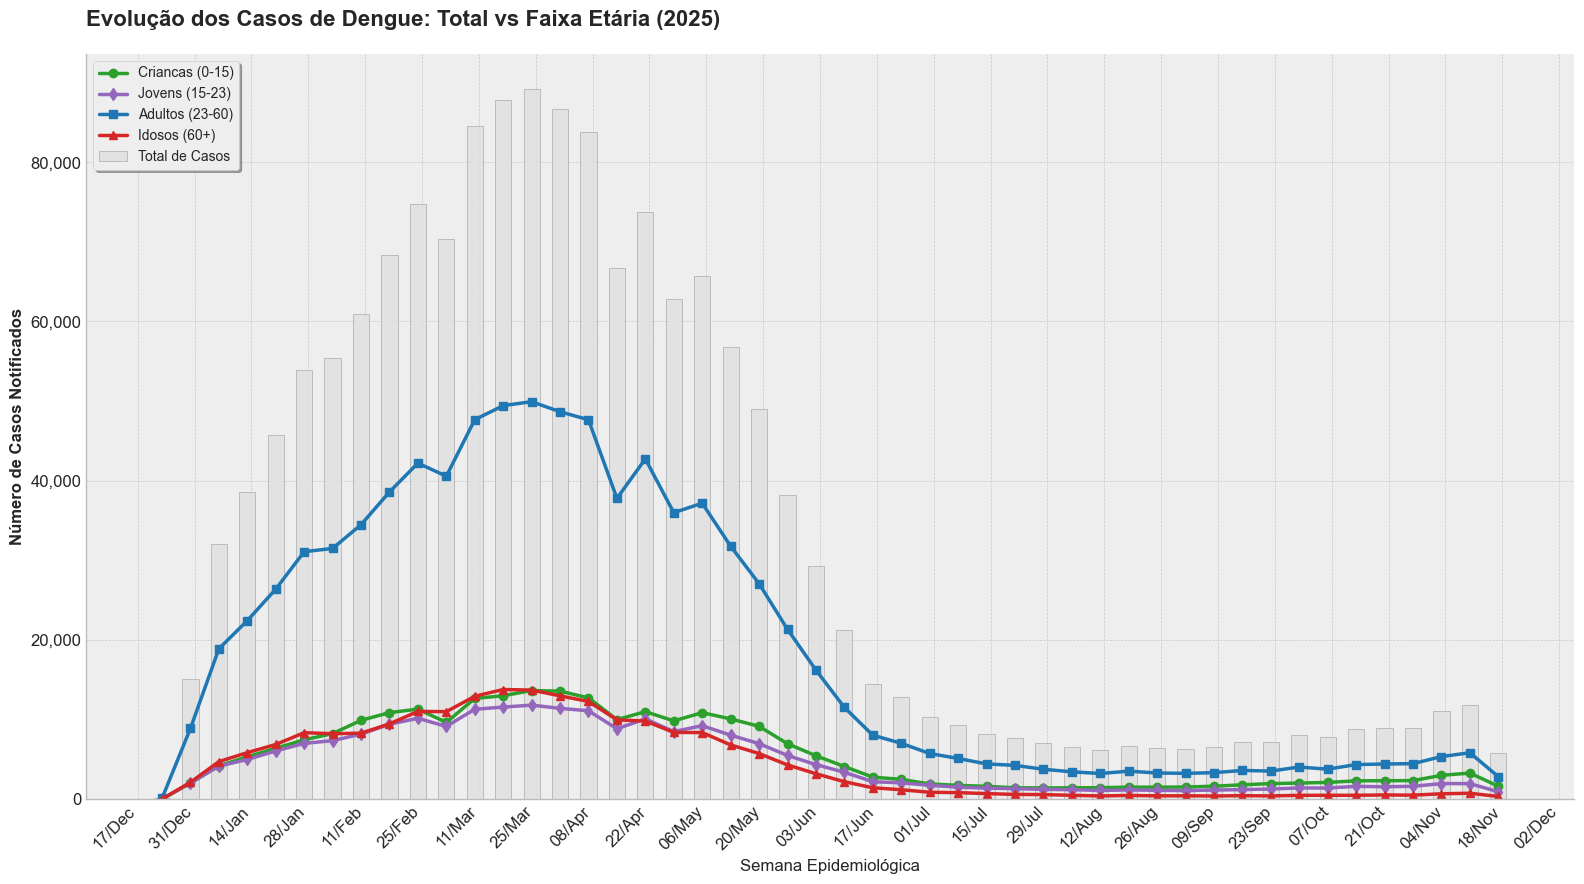


RESUMO POR FAIXA ETÁRIA (MÉDIA SEMANAL)
  Adultos (23-60)          : 18,777.2 casos/semana
  Criancas (0-15)          : 5,509.9 casos/semana
  Jovens (15-23)           : 4,679.8 casos/semana
  Idosos (60+)             : 4,483.6 casos/semana

Média total semanal: 33,450.5 casos
Pico máximo: 89,131 casos (Semana de 24/03/2025)


In [39]:
# =============================================================================
# VISUALIZAÇÃO: COMBO CHART (BARRAS + LINHAS)
# =============================================================================

# Configuração do estilo 'Clean'
plt.style.use('bmh') 
fig, ax1 = plt.subplots(figsize=(16, 9))

# Definir as faixas etárias na ordem correta
faixas_labels = ['Criancas (0-15)', 'Jovens (15-23)', 'Adultos (23-60)', 'Idosos (60+)']
faixas_disponiveis = [f for f in faixas_labels if f in chart_data.columns]

# 1. Plot das Barras (Total de Casos)
bar_width = 4  # Largura em dias (ajuste visual)
bars = ax1.bar(
    chart_data['SEMANA'], 
    chart_data['TOTAL_CASOS'], 
    width=bar_width, 
    color='#e0e0e0', 
    edgecolor='#999999',
    label='Total de Casos', 
    alpha=0.8,
    zorder=1
)

# 2. Plot das Linhas (Faixas Etárias)
# Definição de cores e marcadores para distinção clara
line_styles = {
    'Criancas (0-15)': {'color': '#2ca02c', 'marker': 'o'},
    'Jovens (15-23)': {'color': '#9467bd', 'marker': 'd'},
    'Adultos (23-60)': {'color': '#1f77b4', 'marker': 's'},
    'Idosos (60+)': {'color': '#d62728', 'marker': '^'}
}

# Loop para plotar cada faixa etária
for col in faixas_disponiveis:
    ax1.plot(
        chart_data['SEMANA'], 
        chart_data[col], 
        label=col,
        color=line_styles[col]['color'],
        marker=line_styles[col]['marker'],
        linewidth=2.5,
        markersize=6,
        zorder=2
    )

# =============================================================================
# FORMATAÇÃO E ESTÉTICA
# =============================================================================

# Títulos e Labels
ax1.set_title('Evolução dos Casos de Dengue: Total vs Faixa Etária (2025)', 
             fontsize=16, fontweight='bold', pad=20, loc='left')
ax1.set_ylabel('Número de Casos Notificados', fontsize=12, fontweight='bold')
ax1.set_xlabel('Semana Epidemiológica', fontsize=12)

# Formatação do Eixo X (Datas)
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d/%b'))
ax1.xaxis.set_major_locator(plt.matplotlib.dates.WeekdayLocator(interval=2))
plt.xticks(rotation=45, ha='right')

# Formatação do Eixo Y (Milhares se necessário)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Legenda Unificada
ax1.legend(loc='upper left', frameon=True, fancybox=True, shadow=True, ncol=1, fontsize=10)

# Grid e Layout
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.tight_layout()

# Salvar grafico
fig.savefig('GRAFICOS/07_evolucao_temporal.png', dpi=150, bbox_inches='tight', facecolor='white')
print("Grafico salvo em: GRAFICOS/07_evolucao_temporal.png")

plt.show()

# =============================================================================
# RESUMO ESTATÍSTICO
# =============================================================================
print("\n" + "=" * 70)
print("RESUMO POR FAIXA ETÁRIA (MÉDIA SEMANAL)")
print("=" * 70)
summary = chart_data[faixas_disponiveis].mean().sort_values(ascending=False)
for faixa, media in summary.items():
    print(f"  {faixa:25}: {media:,.1f} casos/semana")
print("=" * 70)

print(f"\nMédia total semanal: {chart_data['TOTAL_CASOS'].mean():,.1f} casos")
print(f"Pico máximo: {chart_data['TOTAL_CASOS'].max():,} casos (Semana de {chart_data.loc[chart_data['TOTAL_CASOS'].idxmax(), 'SEMANA'].strftime('%d/%m/%Y')})")